In [1]:
import pandas as pd # standard python data library
import geopandas as gp # the geo-version of pandas
import numpy as np 
import os
import fiona
from statistics import mean, median
from pandas import read_csv
gp.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' #To load KML files

# VEST PA Validation

In [2]:
vest_pa_18 = gp.read_file("./raw-from-source/VEST/pa_2018/pa_2018.shp")

# Documentation Election Results

Election results from the Pennsylvania Secretary of State's office via OpenElections (https://github.com/openelections/openelections-data-pa/). Precinct data was corrected with canvass reports for the following counties: Berks, Blair, Bradford, Cambria, Carbon, Crawford, Elk, Forest, Franklin, Lawrence, Lycoming, Mifflin, Montgomery, Montour, Northumberland, Susquehanna. The candidate totals for Berks, Blair, Crawford, and Mifflin differ from the county totals reported by the state and therefore the statewide totals differ from the official results accordingly.

# Documentation Shapefiles

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

Precinct boundaries throughout the state were edited to match voter assignments in the PA Secretary of State voter file from the 2018 election cycle. While some edits reflect official updates to wards or divisions the great majority involve voters incorrectly assigned to voting districts by the counties. As such the VEST shapefile endeavors to reflect the de facto precinct boundaries and these often differ from the official voting district boundaries, in some cases quite drastically. Wherever possible edits were made using census boundaries or alternatively using the parcel shapefiles from the respective counties. 

In certain areas voter assignments appear so erratic that it is impractical to place all voters within their assigned precinct. These areas were edited so as to place as many voters as possible within their assigned precinct without displacing a greater number from their assigned precinct. In general, municipal boundaries were retained except where significant numbers of numbers were misassigned to the wrong municipality. In cases where the odd/even split was incorrectly reversed for precinct boundary streets the official boundary was retained. All such cases involved near equal number of voters swapped between voting districts.

The following revisions were made to the base shapefiles to match the de facto 2018 precinct boundaries consistent with the voter file. Individual precincts are noted in cases of splits or merges. Due to the sheer number of edits boundary adjustments are noted at the borough/township level. There may be as many as two dozen individual precincts that were revised within a given municipality.

Adams: Adjust Cumberland, Franklin  
Allegheny: Merge CD splits for S Fayette 3/5; Split Pittsburgh W5 11/17; Merge Pittsburgh W16 9/11/12, Align   McCandless with municipal boundary; Adjust Avalon, Baldwin, Bethel Park, Braddock, Brentwood, Castle Shannon, Clairton, Collier, Coraopolis, Crescent, Dormont, Dravosburg, Duquesne, E Deer, E McKeesport, E Pittsburgh, Elizabeth, Emsworth, Forward, Glassport, Hampton, Harmar, Ingram, Jefferson Hills, Kennedy, Leet, Liberty, Marshall, McCandless, McKees Rocks, McKeesport, Monroeville, Moon, Mount Lebanon, Munhall, N Fayette, N Versailles, O'Hara, Oakdale, Penn Hills, Pine, Pittsburgh (nearly all wards), Pleasant Hills, Reserve, Richland, Ross, Scott, Sewickley, Shaler, S Fayette, S Park, Stowe, Swissvale, Upper St. Clair, W Deer, W Homestead, W Mifflin, W View, Whitaker, Whitehall, Wilkins, Wilkinsburg
Armstrong: Align Dayton, Elderton, Ford City, Kittanning, N Apollo with municipal boundaries; Adjust Ford City, Gilpin, Kiskiminetas, Kittanning, Manor, N Buffalo, Parks, Parker City, S Buffalo  
Beaver: Adjust Aliquippa, Ambridge, Baden, Beaver, Brighton, Center, Chippewa, Conway, Economy, Franklin, Hanover, Harmony, Hopewell, Midland, Monaca, N Sewickley  
Bedford: Adjust Bedford Boro, Bedford Twp  
Berks: Adjust Cumru, Douglass, Oley, Maxatawny, Robeson, Sinking Spring, Spring, Union  
Blair: Merge Tunnelhill/Allegheny Twp 4; Align Altoona, Bellwood, Duncansville, Hollidaysburg, Newry, Roaring Spring, Tyrone, Williamsburg with municipal boundaries; Adjust Allegheny, Altoona, Antis, Frankstown, Freedom, Greenfield, Huston, Juniata, N Woodbury, Logan, Snyder, Tyrone Boro, Tyrone Twp  
Bucks: Align Sellersville, Tullytown with municipal boundaries; Adjust Bensalem, Bristol Boro, Bristol Twp, Buckingham, Doylestown Twp, Falls, Hilltown, Lower Makefield N, Lower Southampton E, Middletown, Milford, Morrissville, Newtown Twp, Northampton, Solebury Lower, Solebury, Springfield, Tinicum, Upper Makefield, Upper Southampton E, Warminster, Warrington, W Rockhill  
Butler: Merge CD splits for Cranberry E 2, 3, Cranberry W 1, 2, Jefferson 1, 2; Align Butler Twp, Valencia with municipal boundaries; Adjust Adams, Buffalo, Butler Boro, Butler Twp, Center, Cranberry E, Cranberry W, Jackson, Jefferson, Zelienople
Cambria: Align Daisytown, Sankertown, W Taylor, Wilmore with municipal boundaries; Adjust Cambria, Conemaugh, Croyle, E Taylor, Ebensburg, E Carroll, Geistown, Jackson, Johnstown W8, W17, W20, Lower Yoder, Northern Cambria, Portage Boro, Portage Twp, Richland, Southmont, Stonycreek, Summerhill, Susquehanna, Upper Yoder, W Carroll, Westmont
Cameron: Adjust Emporium, Shippen
Carbon: Adjust Jim Thorpe, Kidder, Mahoning, New Mahoning, Summit Hill
Centre: Merge CD splits for Halfmoon E Central/Proper; Merge Ferguson Northeast 1 A/B; Adjust Benner, College, Ferguson, Patton
Chester: Merge CD/LD splits for Birmingham 2, Phoenixville M 1; Adjust Birmingham, E Bradford S, E Fallowfield, E Goshen, E Marlborough, Easttown, N Coventry, Spring City, Tredyffrin M, Uwchlan, W Bradford, W Caln, W Goshen N, W Goshen S, Westtown
Clarion: Merge Emlenton/Richland; Adjust Clarion, Highland, Farmington, Knox
Clearfield: Adjust Bradford, Cooper, Decatur, Golden Rod, Lawrence Glen Richie, Morris, Plympton, Woodward
Columbia: Merge Ashland/Conyngham; Adjust Orange, Scott West
Crawford: Align Mead, Woodcock with municipal boundaries
Cumberland: Merge CD splits for N Middleton 1, 3; Split Lower Allen 1/Annex; Align Carlisle, E Pennsboro, Hampton, Lemoyne, Lower Allen, Mechanisburg, Middlesex, Mount Holly Springs, N Middleton, Shiremanstown, Silver Spring, W Pennsboro, Wormsleysburg with municipal boundaries
Dauphin: Align Middletown with municipal boundary; Adjust Derry, Harrisburg W1, W7, W8, W9, Hummelstown, Lower Paxton, Lykens, Middletown
Delaware: Adjust Chester, Concord, Darby Boro, Darby Twp, Haverford, Marple, Nether Providence, Newtown, Radnor, Ridley, Sharon Hill, Thornbury, Tinicum, Trainer, Upper Chichester, Upper Darby, Upper Providence
Elk: Split N/S Horton; Adjust Johnsonburg, Ridgeway Boro, Ridgeway Twp, St. Marys
Erie: Adjust Erie W1, W4, W5, W6, Greene, Lawrence Park, McKean, Millcreek, North East
Fayette: Align Dunbar with municipal boundary; Adjust Brownsville, Bullskin, Dunbar, Georges, German, Luzerne, N Union, Redstone
Franklin: Align Mercersburg with municipal boundary; Adjust Antrim, Fannett, Greene, Guilford, Hamilton, Metal, Peters, Quincy, St. Thomas, Southampton, Washington
Fulton: Align McConnellsburg with municipal boundary
Greene: Align Carmichaels with municipal boundary; Adjust Cumberland, Dunkard, Franklin, Jefferson, Lipencott, Mather, Morgan Chart, Monongahela, Nemacolin
Huntingdon: Merge CD splits for Penn; Adjust Huntingdon, Mount Union
Jefferson:  Align Reynoldsville with municipal boundary; Adjust Punxsutawney
Lackawanna: Adjust Archbald, Blakely, Carbondale, Clarks Summit, Dickson City, Dunmore, Fell, Jermyn, Jessup, Mayfield, Moosic, Old Forge, Olyphant, Scranton W1, W2, W3, W6, W7, W10, W12, W13, W14, W15, W16, W19, W20, W23, S Abington, Taylor, Throop
Lancaster: Split Lancaster 7-8 CV/LS; Adjust Brecknock, Columbia, E Hempfield, E Lampeter, E Petersburg, Elizabethtown, Ephrata, Lancaster W4, W8, Lititz, Manheim, Manor, Millersville, Mt Joy Boro, Mt Joy Twp, New Holland, Penn, Providence, Rapho, Warwick, W Cocalico, W Donegal, W Hempfield
Lawrence: Adjust Neshannock
Lebanon: Adjust Jackson, Lickdale, S Lebanon, Union Green Pt
Lehigh: Adjust Lower Macungie, Salisbury
Luzerne: Merge CD splits for Hazle 1; Align Avoca, Pittston with municipal boundaries; Adjust Butler, Dallas, Exeter, Foster, Freeland, Hanover, Hazle, Jenkins, Kingston Boro, Kingston Twp, Larksville, Lehman, Nanticoke, Newport, Plains, Salem, Smoyersville, W Wyoming, Wilkes-Barre
Lycoming: Align Williamsport with municipal boundary; Adjust Jersey Shore
McKean: Adjust Bradford City, Bradford Twp, Foster, Keating, Otto
Mercer: Adjust Delaware, Fredonia, Greenville, Hempfield, Hermitage, Sharon, Sharpsville, S Pymatuning, W Salem
Mifflin: Split Brown Reedsville/Church Hill
Monroe: Align E Stroudsburg with municipal boundary; Adjust E Stroudsburg, Smithfield
Montgomery: Add CD special election splits for Horsham 2-2, Perkiomen 1, Plymouth 2-3; Adjust Abington, Lower Merion, Pottstown, Springfield, Upper Moreland, Upper Merion, Upper Providence
Northampton: Align Glendon, Walnutport with municipal boundaries; Adjust Bangor, Bethlehem W2, W3, W4, W7, W9, W14, W15, Bethlehem Twp, Bushkill, Easton, Forks, Hanover, Hellertown, Lehigh, Lower Mt Bethel, Lower Saucon, Moore, Nazareth, Palmer, Plainfield, Upper Mt Bethel, Washington, Williams
Northumberland: Align Northumberland with municipal boundary; Adjust Coal, Milton, Mount Carmel W, Natalie-Strong, Northumberland, Point, Ralpho, Shamokin, Sunbury, Upper Augusta
Philadelphia: Adjust 1-19/21, 5-3/19, 7-2/3/17, 7-6/7, 9-5/6, 15-7/10, 17-20/26, 20-5/10, 21-1/15, 21-40/41, 22-21/26, 23-11/12, 25-9/17, 25-4/7/12, 25-10/12, 26-1/2, 27-7/8, 27-18/20/21, 28-1/8, 29-9/11, 29-10/17, 30-14/15, 31-5/6, 38-11/17, 38-13/20, 38-15/19, 40-12/18/19, 40-17/19, 42-3/4/7, 44-8/14, 50-3/12, 50-11/27, 52-2/6/9, 52-3/8, 57-6/7, 57-10/27, 57-17/28, 58-6/12, 62-5/19, 65-4/7, 65-11/16, 66-22/34  
Pike: Adjust Matamoras  
Potter: Adjust Galeton, Sharon  
Schuylkill: Adjust Coaldale, N Manheim, Norwegian, Porter, Pottsville
Somerset: Align New Centerville with municipal boundary; Adjust Conemaugh, Jefferson, Middlecreek, Paint, Somerset Boro  
Susquehanna: Adjust Montrose; Lanesboro, Susquehanna Depot  
Tioga: Adjust Delmar, Wellsboro  
Union: Adjust Buffalo, White Deer  
Venango: Adjust Franklin, Sugarcreek, Cornplanter, Oil City  
Warren: Adjust Conewango  
Washington: Align Allenport, Beallsville, Burgettstown, Canonsburg, Carroll, Charleroi, Claysville, Elco, Finleyville, Houston, Long Branch, McDonald, Monongahela, Speers, Twilight with municipal boundaries; Adjust Amwell, Bentleyville, California, Canonsburg, Canton, Cecil, Centerville, Chartiers, Donegal, Donora, Fallowfield, Hanover, Independence, Mount Pleasant, N Franklin, N Strabane, Peters, Robinson, Smith, Somerset, S Franklin, S Strabane, Union Washington, W Brownsville  
Wayne: Adjust Honesdale  
Westmoreland: Merge CD splits for Unity Pleasant Unity; Align Greensburg with municipal boundary; Adjust Allegheny, Arnold, Bell, Derry, E Huntingdon, Fairfield, Greensburg W1-W8, Hempfield, Jeannette, Latrobe, Ligonier, Lower Burrell, Monessen, Mount Pleasant, Murraysville, New Kensington, N Belle Vernon, N Huntingdon, Penn, Rostraver, St. Clair, Scottdale, Sewickley, S Greensburg, S Huntingdon, Trafford, Upper Burrell, Unity, Vandergrift, Washington, Youngwood  
Wyoming: Adjust Falls  
York: Merge CD splits for York Twp 5-3; Align E Prospect, Goldsboro, Jefferson, Manchester, Monaghan, Wellsville, York with municipal boundaries; Adjust Chanceford, Codorus, Conewago, Dover, Fairview, Hanover, Jackson, Lower Windsor, New Freedom, Newberry, N Codorus, Penn, Red Lion, Shrewsbury, Spring Garden, Springbettsbury, W Manchester, Windsor Boro, Windsor Twp, Wrightsville, York Twp, York W5, W6, W15  

## Election Results

#### Load a FIPS file

In [3]:
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Pennsylvania"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)
fips_file["unique_ID"] =  "42" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()
pa_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))

#### Load election results

Note: Due to an issue with the combined file that I discovered, results for 3 counties are loaded separately.  
The full file does not include the Governors results from Butler or Westmoreland, does not include Senate results from Clearfield  

Note: Results include "Straight Party" votes, these do not need to be counted or added.

In [4]:
pa_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/20181106__pa__general__precinct.csv")
butler_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__butler__precinct.csv")
clearfield_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__clearfield__precinct.csv")
westmoreland_election = pd.read_csv("./raw-from-source/Election_Results/openelections-data-pa-master/2018/counties/20181106__pa__general__westmoreland__precinct.csv")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Clean Election Results

In [5]:
#Filter down election results to needed columns
pa_election = pa_election[["county","precinct","office","party","candidate","votes"]]
butler_election = butler_election[["county","precinct","office","party","candidate","votes"]]
clearfield_election = clearfield_election[["county","precinct","office","party","candidate","votes"]]
westmoreland_election = westmoreland_election[["county","precinct","office","party","candidate","votes"]]

#Add the votes for those 3 counties to a df
other_list = [butler_election,clearfield_election,westmoreland_election]
other_df = pd.concat(other_list)

#Remove votes from those 3 counties from the combined file
lone_counties = ["Butler","Clearfield","Westmoreland"]
pa_election = pa_election[~pa_election["county"].isin(lone_counties)]

#Add votes from those 3 counties in using data from the county-specific files
two_dfs_list = [other_df,pa_election]
pa_election = pd.concat(two_dfs_list)

#Update the office names
office_changes = {'GOVERNOR':'Governor','United States Senator':"U.S. Senate"}
pa_election["office"]=pa_election["office"].map(office_changes).fillna(pa_election["office"])

#Filter down results to the relevant offices 
office_list = ["U.S. Senate", 'Governor']
filtered_pa_election = pa_election[pa_election["office"].isin(office_list)]
county_changes_dict = {"Washington ":"Washington"}

#Update the county names and add a FIPS using the dictionary created above
filtered_pa_election["county"] = filtered_pa_election["county"].map(county_changes_dict).fillna(filtered_pa_election["county"])
filtered_pa_election["County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered_pa_election.loc[:,"county"])

<ipython-input-5-7f2ab0355508>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["county"] = filtered_pa_election["county"].map(county_changes_dict).fillna(filtered_pa_election["county"])
<ipython-input-5-7f2ab0355508>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["County_FIPS"]=filtered_pa_election.loc[:,"county"].map(pa_fips_dict).fillna(filtered_pa_election.loc[:,"county"])


In [6]:
#Create a column to pivot the dataframe on
filtered_pa_election["pivot_col"]=filtered_pa_election["County_FIPS"]+filtered_pa_election["precinct"]

#Standardize the other columns
filtered_pa_election["candidate"]=filtered_pa_election["candidate"].str.upper()
filtered_pa_election["candidate"] = filtered_pa_election["candidate"].str.strip()
filtered_pa_election["party"] = filtered_pa_election["party"].str.upper()

#Create a dictionary to change the party names
party_changes_dict = {"DEMOCRATIC":"DEM","REPUBLICAN":"REP","LIBERTARIAN":"LIB","GREEN":"GRN","GR":"GRN","GRE":"GRN","DEMOCRAT":"DEM"}
filtered_pa_election["party"] = filtered_pa_election["party"].map(party_changes_dict).fillna(filtered_pa_election["party"])

#Filter out the write-in votes
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["candidate"].str[-3:]=="(W)")]

<ipython-input-6-84736e6c51b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["pivot_col"]=filtered_pa_election["County_FIPS"]+filtered_pa_election["precinct"]
<ipython-input-6-84736e6c51b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_pa_election["candidate"]=filtered_pa_election["candidate"].str.upper()
<ipython-input-6-84736e6c51b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [7]:
#Standardize the candidate names

candidate_name_changes = {
   'DEMOCRATIC':'DEM', 
 'REPUBLICAN':"REP",
 'GREEN':"GRN", 
 'INDEPENDENT':"IND", 
 'LIBERTARIAN':"LIB",
    
    
    'LOU BARLETTA':'BARLETTA',
 'LOU  BARLETTA':'BARLETTA',
 'LOU BARLETTA JR':'BARLETTA',
 'BARLETTA, LOU':'BARLETTA',

    'KEN V KRAWCHUK, GOVERNOR':'KRAWCHUK',
    'KEN V. KRAWCHUK/K.S. SMITH':'KRAWCHUK',
    'KRAWCHUK /SMITH':'KRAWCHUK',
    'KEN V. KRAWCHUK KATHLEEN S. SMITH':'KRAWCHUK',
    'KRAWCHUK\\SMITH':'KRAWCHUK',
     'KEN V KRAWCHUK':'KRAWCHUK', 
 'KRAWCHUK / SMITH':'KRAWCHUK',
 'KRAWCHUK/SMITH':'KRAWCHUK',
 'KEN V. KRAWCHUK/K. S. SMITH':'KRAWCHUK',
 'KEN KRAWCHUK':'KRAWCHUK',
 'KRAWCHUK/ SMITH':'KRAWCHUK',
 'KEN V. KRAWCHUK':'KRAWCHUK',
 'KRAWCHUK, KEN V.':'KRAWCHUK',
 'KEN V. KRAWCHUK / K. S. SMITH':'KRAWCHUK',
    
    'GLOVER / BOSTICK':'GLOVER',
    'PAUL GLOVER, GOVERNOR':'GLOVER',
    'GLOVER / BOWSER BOSTICK':'GLOVER',
    'PAUL GLOVER/J. BOWSER-BOSTICK':'GLOVER',
    'GLOVER/BOSTICK':'GLOVER',
    'GLOVER/BOWSER-BOSTIC':'GLOVER',
    'PAUL GLOVER JOCOLYN BOWSER-BOSTICK':'GLOVER',
    'GLOVER/BOWSERBOS':'GLOVER',
    'GLOVER\\BOWSERBOSTICK':'GLOVER',
     'GLOVER / BOWSER-BOSTICK':'GLOVER', 
 'GLOVER/BOWSER-BOSTICK':'GLOVER',
 'GLOVER/BOWSER-BOS':'GLOVER', 
 'PAUL GLOVER/JOCOLYN BOWER-BOSTICK':'GLOVER', 
 'PAUL  GLOVER':'GLOVER',
 'GLOVER / BOWSER-BOS':'GLOVER',
 'PAUL GLOVER':'GLOVER',
 'GLOVER, PAUL':'GLOVER',
 'PAUL GLOVER / J. BOWSER BOSTICK':'GLOVER',
    
    'SCOTT R WAGNER, GOVERNOR':'WAGNER',
    'SCOTT R. WAGNER JEFF BARTOS':'WAGNER',
    'WAGNER\\BARTOS':'WAGNER',
     'SCOTT R WAGNER':'WAGNER', 
    'WAGNER/BARTOS':'WAGNER',
 'WAGNER / BARTOS':'WAGNER',
  'SCOTT R. WAGNER/JEFF BARTOS':'WAGNER',
 'WAGNER/ BARTOS':'WAGNER',
 'SCOTT R WAGNER AND JEFF BARTOS':'WAGNER',
 'SCOTT WAGNER':'WAGNER',
 'SCOTT R. WAGNER':'WAGNER',
 'WAGNER, SCOTT R.':'WAGNER',
 'SCOTT R. WAGNER / JEFF BARTOS':'WAGNER',
    
    'TOM WOLF, GOVERNOR':'WOLF',
    'TOM WOLF JOHN FETTERMAN':'WOLF',
    'WOLF\\FETTERMAN':'WOLF',
     'WOLF / FETTERMAN':'WOLF',
 'WOLF/FETTERMAN':'WOLF',
 'TOM WOLF/JOHN FETTERMAN':'WOLF', 
 'TOM  WOLF':'WOLF',
 'TOM WOLF AND JOHN FETTERMAN':'WOLF',
 'TOM WOLF':'WOLF',
 'WOLF, TOM':'WOLF',
 'TOM WOLF / JOHN FETTERMAN':'WOLF',
    
    'DALE KERNS':"KERNS",
    'DALE R KEARNS, JR':"KERNS",
 'DALE R KERNS, JR':"KERNS",
 'DALE R. KERNS JR.':"KERNS",
  'DALE KERNS JR':"KERNS", 
 'DALE R. KERNS, JR':"KERNS",
 'DALE R. KERNS, JR.':"KERNS",
 'DALE R. KERNS JR':"KERNS", 
 'DALE R KERNS JR':"KERNS",
    'KERNS, JR., DALE R.':"KERNS",
    
    'ROBERT CASEY JR.':"CASEY",
     'BOB CASEY, JR':"CASEY",
 'BOB CASEY JR.':"CASEY",
 'BOB  CASEY, JR.':"CASEY",
 'BOB CASEY':"CASEY",
 'CASEY, JR., BOB':"CASEY",
 'BOB CASEY, JR.':"CASEY", 
 'BOB CASEY JR':"CASEY", 
    
    'NEAL GALE':"GALE",
 'NEAL  GALE':"GALE",
 'GALE, NEAL':"GALE",
 'NEALE GALE':"GALE"}

#Modify the candidate names
filtered_pa_election["candidate"] = filtered_pa_election["candidate"].map(candidate_name_changes).fillna(filtered_pa_election["candidate"])

In [8]:
#Create lists to filter out certain candidates and parties
candidates_to_remove = ["NO AFFILIATION",'WRITE - IN','BLANK VOTES',
                      'WRITE-INS','WRITE IN','CAST VOTES','OVER VOTES',
                     'UNDER VOTES','WRITE IN VOTES','WRITE-IN VOTES']
parties_to_remove = ["NAF","IND"]

#Fill NA values in the votes column
filtered_pa_election["votes"]=filtered_pa_election["votes"].fillna(0)

#Filter down to relevant candidates and parties
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["candidate"].isin(candidates_to_remove))]
filtered_pa_election = filtered_pa_election[~(filtered_pa_election["party"].isin(parties_to_remove))]

#Due to data oddities, in a few occasions the party is where the candidate should be and vice versa
filtered_pa_election["party"] = filtered_pa_election["party"].fillna(filtered_pa_election["candidate"])
filtered_pa_election["candidate"] = filtered_pa_election["candidate"].fillna(filtered_pa_election["party"])

#Change votes to strings to be able to edit out the "," formatting
filtered_pa_election["votes"]=filtered_pa_election["votes"].astype(str)
filtered_pa_election["votes"]=filtered_pa_election["votes"].str.replace(',', '').astype(int)

#Cast the votes back to integers
filtered_pa_election.loc[:,"votes"]=filtered_pa_election.loc[:,"votes"].astype(int)

#Delete the duplicates b/c of apparent duplicate results in Delaware County
filtered_pa_election = filtered_pa_election.drop_duplicates()

#Create a candidate column
filtered_pa_election["cand_col"]=filtered_pa_election["office"]+filtered_pa_election["candidate"]

In [9]:
print(filtered_pa_election["cand_col"].unique())

['U.S. SenateCASEY' 'U.S. SenateBARLETTA' 'U.S. SenateGALE'
 'U.S. SenateKERNS' 'GovernorWOLF' 'GovernorWAGNER' 'GovernorGLOVER'
 'GovernorKRAWCHUK']


#### Pivot election results

In [10]:
pivoted_2018 = pd.pivot_table(filtered_pa_election, values=["votes"], index=["pivot_col"],columns=["cand_col"],aggfunc=sum)

#### Clean pivoted file

In [11]:
#Clean indices and rename columns
pivoted_2018.reset_index(drop=False,inplace=True)
pivoted_2018.columns = pivoted_2018.columns.droplevel(0)
pivoted_2018.columns=["cty_pct","G18GOVGGLO","G18GOVLKRA","G18GOVRWAG","G18GOVDWOL","G18USSRBAR","G18USSDCAS","G18USSGGAL","G18USSLKER"]

#Fill NA votes
pivoted_2018 = pivoted_2018.fillna(0)

#Add a county column back to the df
pivoted_2018["county"]=pivoted_2018["cty_pct"].str[0:3]

#Remove "Total" votes
pivoted_2018 = pivoted_2018[~(pivoted_2018["cty_pct"].str[3:]=="Total")]

#### Check Election Result Totals

In [12]:
col_list=["G18GOVGGLO","G18GOVLKRA","G18GOVRWAG","G18GOVDWOL","G18USSRBAR","G18USSDCAS","G18USSGGAL","G18USSLKER"]
for i in col_list:
    print(i)
    print(sum(vest_pa_18[i]))
    print(sum(pivoted_2018[i]))
    print("")
    


G18GOVGGLO
27797
27807.0

G18GOVLKRA
49238
49238.0

G18GOVRWAG
2040233
2039598.0

G18GOVDWOL
2895931
2896074.0

G18USSRBAR
2135223
2134991.0

G18USSDCAS
2792693
2792656.0

G18USSGGAL
31228
31264.0

G18USSLKER
50927
50540.0



In [13]:
diff_counties = []

for i in col_list:
    diff = pivoted_2018.groupby(["county"]).sum()[i]-vest_pa_18.groupby(["COUNTYFP"]).sum()[i]
    print(i)
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    print(diff[diff != 0])
    print("")

#print(diff_counties)
fips_name_dict=dict(zip(fips_file["FIPS County"],fips_file["County Name"]))
#print(fips_name_dict)
for i in diff_counties:
    print(fips_name_dict.get(i))

G18GOVGGLO
county
021    2.0
025   -2.0
039    6.0
047    4.0
Name: G18GOVGGLO, dtype: float64

G18GOVLKRA
county
039    1.0
097   -1.0
Name: G18GOVLKRA, dtype: float64

G18GOVRWAG
county
015    -58.0
021     11.0
039    288.0
055   -260.0
067     -8.0
073      3.0
091   -700.0
093     -2.0
097     -9.0
115    100.0
Name: G18GOVRWAG, dtype: float64

G18GOVDWOL
county
015    -28.0
021     20.0
039    194.0
053     -1.0
067     -7.0
081      3.0
091    -30.0
093     -4.0
097     -4.0
Name: G18GOVDWOL, dtype: float64

G18USSRBAR
county
015    -61.0
067     -9.0
091   -150.0
093     -2.0
097    -11.0
115      1.0
Name: G18USSRBAR, dtype: float64

G18USSDCAS
county
015   -26.0
053    -1.0
067    -3.0
093    -3.0
097    -3.0
115    -1.0
Name: G18USSDCAS, dtype: float64

G18USSGGAL
county
015    33.0
047     3.0
091     1.0
093    -1.0
Name: G18USSGGAL, dtype: float64

G18USSLKER
county
015     62.0
025     -2.0
055    -10.0
091    -12.0
097   -281.0
119   -144.0
Name: G18USSLKER, dtype: floa

### Join Election Results w/ VEST Final to Validate

In [14]:
#Check the number of rows in the two dataframes
print(vest_pa_18.shape)
print(pivoted_2018.shape)

(9160, 13)
(9161, 10)


In [15]:
#Print out the head of the two dfs
print(pivoted_2018.head())
print(vest_pa_18.head())

           cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  G18GOVDWOL  \
0   001Abbottstown         2.0         2.0       185.0       120.0   
1  001Arendtsville         2.0         4.0       172.0       160.0   
2  001Bendersville         2.0         3.0        98.0        76.0   
3       001Berwick         5.0         9.0       554.0       318.0   
4   001Biglerville         2.0         5.0       215.0       168.0   

   G18USSRBAR  G18USSDCAS  G18USSGGAL  G18USSLKER county  
0       183.0       120.0         2.0         5.0    001  
1       178.0       151.0         3.0         6.0    001  
2       103.0        74.0         2.0         1.0    001  
3       575.0       289.0         5.0        14.0    001  
4       231.0       152.0         7.0         3.0    001  
  STATEFP COUNTYFP   VTDST          NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
0      42      001  000010   ABBOTTSTOWN         120         183           5   
1      42      001  000020  ARENDTSVILLE         151         178 

In [16]:
#Based on the print, it seems like the precinct name should be capitalized
pivoted_2018["cty_pct"] = pivoted_2018["cty_pct"].str.upper()

#Two options for the unique ID, use the second one
print((vest_pa_18["COUNTYFP"]+vest_pa_18["NAME"]).nunique())
print((vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]).nunique())

#Create a unique ID out of election results to join on
vest_pa_18["unique_vote_id"]=vest_pa_18["G18USSDCAS"].astype(str)+vest_pa_18["G18USSRBAR"].astype(str)+vest_pa_18["G18USSLKER"].astype(str)+vest_pa_18["G18USSGGAL"].astype(str)+vest_pa_18["G18GOVDWOL"].astype(str)+vest_pa_18["G18GOVRWAG"].astype(str)

vest_pa_18["join_col_vest"]=vest_pa_18["COUNTYFP"]+vest_pa_18["VTDST"]+vest_pa_18["NAME"]

#Reformat the columns in the source election results so they are all integers
for i in col_list:
    pivoted_2018.loc[:,i]=pivoted_2018.loc[:,i].astype(int)

pivoted_2018["unique_vote_id"]=pivoted_2018["G18USSDCAS"].astype(str)+pivoted_2018["G18USSRBAR"].astype(str)+pivoted_2018["G18USSLKER"].astype(str)+pivoted_2018["G18USSGGAL"].astype(str)+pivoted_2018["G18GOVDWOL"].astype(str)+pivoted_2018["G18GOVRWAG"].astype(str)

#Remove the duplicate voter ID columns
dup_list = ["000000","2591002611"]
joined_vest_pa_18 = vest_pa_18[~(vest_pa_18["unique_vote_id"].isin(dup_list))]

#Remove the duplicate voter ID columns
joined_pivoted_2018 = pivoted_2018[~(pivoted_2018["unique_vote_id"].isin(dup_list))]

#Merge the two
vote_name_hack = pd.merge(joined_vest_pa_18,joined_pivoted_2018,how="outer",on="unique_vote_id",indicator=True)


9108
9160


In [17]:
print(vote_name_hack["_merge"].value_counts())

#Using this allowed us to join 9019 precincts (note the totals are off b/c of the precincts removed above)

both          9019
right_only     140
left_only      137
Name: _merge, dtype: int64


In [18]:
#Grab the needed columns from the merged df
name_quick = vote_name_hack[vote_name_hack["_merge"]=="both"][["cty_pct","join_col_vest"]]

#Create a dictionary to change the names
rename_dict = dict(zip(name_quick["cty_pct"],name_quick["join_col_vest"]))

#Update the names
pivoted_2018["cty_pct"]=pivoted_2018["cty_pct"].map(rename_dict).fillna(pivoted_2018["cty_pct"])

In [19]:
#Update certain columns to reflect apparent changes in precincts vote results
data_columns = ['G18GOVGGLO', 'G18GOVLKRA', 'G18GOVRWAG', 'G18GOVDWOL',
       'G18USSRBAR', 'G18USSDCAS', 'G18USSGGAL', 'G18USSLKER']

for i in data_columns:
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045SPRINGFIELD 2W 3P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045SPRINGFIELD 2W 3P EMERG",i]) 
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 11P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 11P EMERG",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 8P",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="045UPPER DARBY 6D 8P EMERG",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="095LOWER MT BETHEL TWP LOWER",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="095LOWER MT BETHEL TWP LOWER - IND",i])
    pivoted_2018.loc[pivoted_2018["cty_pct"]=="095PALMER TWP UPPER WESTERN",i]+=int(pivoted_2018.loc[pivoted_2018["cty_pct"]=="095PALMER TWP UPPER WESTERN - NAZ IND",i])

#Remove these precincts from the df
remove_list = ["045SPRINGFIELD 2W 3P EMERG","045UPPER DARBY 6D 11P EMERG","045UPPER DARBY 6D 8P EMERG",
              "095LOWER MT BETHEL TWP LOWER - IND","095PALMER TWP UPPER WESTERN - NAZ IND"]
pivoted_2018 = pivoted_2018[~(pivoted_2018["cty_pct"].isin(remove_list))]

In [20]:
#elections_to_vest_changes = pd.read_csv("./elections_to_vest_changes.csv")
#elections_to_vest_changes = dict(zip(elections_to_vest_changes["elections_name"],elections_to_vest_changes["vest_name"]))

In [21]:
elections_to_vest_changes = {'119WHITE DEER 4': '119000250WHITE DEER DISTRICT 04', '119WHITE DEER 3': '119000240WHITE DEER DISTRICT 03', '119WHITE DEER 2': '119000230WHITE DEER DISTRICT 02', '119WHITE DEER 1': '119000220WHITE DEER DISTRICT 01', '119WEST BUFFALO': '119000210WEST BUFFALO', '119UNION': '119000200UNION', '119NEW BERLIN': '119000190NEW BERLIN', '119MIFFLINBURG WEST': '119000180MIFFLINBURG DISTRICT WEST', '119MIFFLINBURG EAST ': '119000170MIFFLINBURG DISTRICT EAST', '119LIMESTONE': '119000160LIMESTONE', '119LEWISBURG 4': '119000150LEWISBURG WARD 04', '119LEWISBURG 3': '119000140LEWISBURG WARD 03', '119LEWISBURG 2': '119000130LEWISBURG WARD 02', '119LEWISBURG 1': '119000120LEWISBURG WARD 01', '119LEWIS': '119000110LEWIS', '119KELLY 2': '119000100KELLY DISTRICT 02', '119KELLY 1': '119000090KELLY DISTRICT 01', '119HARTLEY': '119000080HARTLEY', '119GREGG': '119000060GREGG', '119EAST BUFFALO 4': '119000055EAST BUFFALO DISTRICT 04', '119EAST BUFFALO 3': '119000051EAST BUFFALO DISTRICT 03', '119EAST BUFFALO 2': '119000040EAST BUFFALO DISTRICT 02', '119EAST BUFFALO 1': '119000030EAST BUFFALO DISTRICT 01', '119BUFFALO 2': '119000020BUFFALO DISTRICT 02', '119BUFFALO 1': '119000010BUFFALO DISTRICT 01', '115HOP BOTTOM BORO': '115000210HOP BOTTOM', '115FRANKLIN TWP': '115000120FRANKLIN', '10124~12': '101002412PHILADELPHIA WARD 24 PRECINCT 12', '10113~08': '101001308PHILADELPHIA WARD 13 PRECINCT 08', '097ZERBE TOWNSHIP': '097000935ZERBE', '097WEST CHILLISQUAQUE TOWNSHIP': '097000920WEST CHILLISQUAQUE', '097WATSONTOWN BOROUGH 2': '097000900WATSONTOWN WARD 02', '097WATSONTOWN BOROUGH 1': '097000890WATSONTOWN WARD 01', '097WASHINGTON TOWNSHIP': '097000880WASHINGTON', '097UPPER AUGUSTA TOWNSHIP NORTHWEST': '097000860UPPER AUGUSTA DISTRICT NORTHWEST', '097UPPER AUGUSTA TOWNSHIP NORTHEAST': '097000850UPPER AUGUSTA DISTRICT NORTHEAST', '097TURBOTVILLE BOROUGH': '097000840TURBOTVILLE', '097TURBOT TOWNSHIP': '097000830TURBOT', '097SUNBURY CITY 6': '097000790SUNBURY WARD 06', '097SUNBURY CITY 5': '097000780SUNBURY WARD 05', '097SUNBURY CITY 4': '097000770SUNBURY WARD 04', '097SUNBURY CITY 3': '097000760SUNBURY WARD 03', '097SUNBURY CITY 2': '097000750SUNBURY WARD 02', '097SUNBURY CITY 1': '097000740SUNBURY WARD 01', '097SNYDERTOWN BOROUGH': '097000730SNYDERTOWN', '097SHAMOKIN TOWNSHIP': '097000720SHAMOKIN', '097SHAMOKIN CITY 7': '097000680SHAMOKIN WARD 07', '097SHAMOKIN CITY 6': '097000670SHAMOKIN WARD 06', '097SHAMOKIN CITY 5': '097000650SHAMOKIN WARD 05 PRECINCT 01', '097SHAMOKIN CITY 4': '097000630SHAMOKIN WARD 04 PRECINCT 01', '097SHAMOKIN CITY 2': '097000600SHAMOKIN WARD 02 PRECINCT 01', '097SHAMOKIN CITY 1': '097000590SHAMOKIN WARD 01', '097RUSH TOWNSHIP': '097000580RUSH', '097ROCKEFELLER TOWNSHIP': '097000570ROCKEFELLER', '097RIVERSIDE BOROUGH': '097000560RIVERSIDE', '097RALPHO TOWNSHIP 2': '097000550RALPHO DISTRICT 02', '097RALPHO TOWNSHIP 1': '097000540RALPHO DISTRICT 01', '097POINT TOWNSHIP WEST': '097000530POINT DISTRICT WEST', '097POINT TOWNSHIP EAST': '097000520POINT DISTRICT EAST', '097NORTHUMBERLAND BOROUGH 3': '097000510NORTHUMBERLAND WARD 03', '097NORTHUMBERLAND BOROUGH 2': '097000500NORTHUMBERLAND WARD 02', '097NORTHUMBERLAND BOROUGH 1': '097000490NORTHUMBERLAND WARD 01', '097MOUNT CARMEL BOROUGH 4': '097000475MOUNT CARMEL WARD 04', '097MOUNT CARMEL BOROUGH 3': '097000445MOUNT CARMEL WARD 03', '097MOUNT CARMEL BOROUGH 2': '097000425MOUNT CARMEL WARD 02', '097MOUNT CARMEL BOROUGH 1': '097000405MOUNT CARMEL WARD 01', '097MOUNT CARMEL TOWNSHIP - WEST': '097000390MOUNT CARMEL DISTRICT WEST', '097MOUNT CARMEL TOWNSHIP - NATALIE / STRONG': '097000375MOUNT CARMEL DISTRICT NATALIE/STRONG', '097MOUNT CARMEL TOWNSHIP - LOCUST GAP': '097000360MOUNT CARMEL DISTRICT LOCUST GAP', '097MOUNT CARMEL TOWNSHIP - DIAMOND / EXCHANGE': '097000355MOUNT CARMEL DISTRICT DIAMOND/EXCHANGE', '097MILTON BOROUGH 5': '097000330MILTON WARD 05', '097MILTON BOROUGH 4': '097000320MILTON WARD 04', '097MILTON BOROUGH 3': '097000310MILTON WARD 03', '097MILTON BOROUGH 2': '097000300MILTON WARD 02', '097MILTON BOROUGH 1': '097000290MILTON WARD 01', '097MCEWENSVILLE BOROUGH': '097000280MCEWENSVILLE', '097MARION HEIGHTS BOROUGH': '097000270MARION HEIGHTS', '097LOWER MAHANOY TOWNSHIP': '097000255LOWER MAHANOY', '097LOWER AUGUSTA TOWNSHIP': '097000240LOWER AUGUSTA', '097LEWIS TOWNSHIP': '097000220LEWIS', '097KULPMONT BOROUGH 3': '097000210KULPMONT PRECINCT 03', '097KULPMONT BOROUGH 2': '097000200KULPMONT PRECINCT 02', '097KULPMONT BOROUGH 1': '097000190KULPMONT PRECINCT 01', '097JORDAN TOWNSHIP': '097000180JORDAN', '097JACKSON TOWNSHIP': '097000170JACKSON', '097HERNDON BOROUGH': '097000160HERNDON', '097EAST CAMERON TOWNSHIP': '097000140EAST CAMERON', '097DELAWARE TOWNSHIP WEST': '097000130DELAWARE DISTRICT WEST', '097DELAWARE TOWNSHIP SOUTH': '097000120DELAWARE DISTRICT SOUTH', '097DELAWARE TOWNSHIP EAST': '097000110DELAWARE DISTRICT EAST', '097COAL TOWNSHIP 6': '097000070COAL WARD 06', '097COAL TOWNSHIP 5': '097000060COAL WARD 05', '097COAL TOWNSHIP 4-2': '097000050COAL WARD 04 PRECINCT 02', '097COAL TOWNSHIP 4-1': '097000040COAL WARD 04 PRECINCT 01', '097COAL TOWNSHIP 3': '097000030COAL WARD 03', '097COAL TOWNSHIP 2': '097000020COAL WARD 02', '097COAL TOWNSHIP 1': '097000010COAL WARD 01', '097CHILLISQUAQUE TOWNSHIP': '097000150EAST CHILLISQUAQUE', '095PALMER TWP UPPER WESTERN': '095001020PALMER DISTRICT UPPER WESTERN', '095LOWER MT BETHEL TWP LOWER': '095000750LOWER MOUNT BETHEL DISTRICT LOWER', '0930013 VALLEY TWP': '093000130VALLEY', '0930012 MAYBERRY TWP': '093000120MAYBERRY', '0930011 MAHONING II': '093000115MAHONING DISTRICT 02', '0930010 MAHONING I': '093000105MAHONING DISTRICT 01', '0930005 DANVILLE BORO THIRD': '093000050DANVILLE DISTRICT 03', '091NEW HANOVER 3': '091002035NEW HANOVER DISTRICT 03', '091MONTGOMERY 7': '091001987MONTGOMERY DISTRICT 07', '091LOWER MERION 5-2': '091001520LOWER MERION WARD 05 PRECINCT 02', '091JENKINTOWN 1': '091001170JENKINTOWN DISTRICT 01', '091FRANCONIA 2-4TH': '091000918FRANCONIA PRECINCT 02 (CD 04)', '091CHELTENHAM 6-3': '091000690CHELTENHAM DISTRICT 06 DIVISION 03', '091ABINGTON 13-3': '091000335ABINGTON WARD 13 DISTRICT 03', '091ABINGTON 4-2': '091000105ABINGTON WARD 04 DISTRICT 02', '0816005 WILLIAMSPORT 5': '081000720WILLIAMSPORT WARD 05', '0730073 WAYNE TWP D2': '073001010WAYNE DISTRICT 02', '0670018 WALKER': '067000200WALKER', '0670015 TURBETT': '067000170TURBETT', '0670010 MONROE': '067000120MONROE', '0670009 MILFORD': '067000110MILFORD', '0670008 MIFFLINTOWN': '067000100MIFFLINTOWN', '0670004 FERMANAGH': '067000040FERMANAGH', '0670003 FAYETTE': '067000030FAYETTE', '0670002 DELAWARE': '067000020DELAWARE', '055WAYNESBORO BORO 3-2': '055000690WAYNESBORO DISTRICT 03 DIVISION 02', '055HAMILTON TWP - 2ND DIST': '055000315HAMILTON DISTRICT 02', '0530004 HICKORY TWP': '053000050HICKORY', '047ST. MARYS 9TH': '047000395ST. MARYS WARD 09', '045UPPER DARBY 6D 11P': '045003660UPPER DARBY TWP DIST 06 PCT 11', '045UPPER DARBY 6D 8P': '045003630UPPER DARBY TWP DIST 06 PCT 08', '045SPRINGFIELD 2W 3P': '045002775SPRINGFIELD TWP WD 02 PCT 03', '039BLOOMING VALLEY BORO': '039000040BLOOMING VALLEY', '02562 WEISSPORT BOROUGH': '025000460WEISSPORT', '02545 PACKER TWP': '025000320PACKER', '021PORTAGE BORO SECOND WD': '021001395PORTAGE WARD 02', '015STEVENS TOWNSHIP': '015000430STEVENS', '015LERAYSVILLE BOROUGH': '015000190LERAYSVILLE'}

In [22]:
pivoted_2018["cty_pct"] = pivoted_2018["cty_pct"].map(elections_to_vest_changes).fillna(pivoted_2018["cty_pct"])

In [23]:
#Add two empty precincts for the join
new_df = pd.DataFrame([["0111578P1ADAMSTOWN",0,0,0,0,0,0,0,0,"011","000000"],["049999999LAKE ERIE",0,0,0,0,0,0,0,0,"049","000000"]],columns=pivoted_2018.columns)
pivoted_2018 = pivoted_2018.append(new_df)


In [24]:
pivoted_2018.reset_index(drop=True,inplace=True)

In [25]:
print(vest_pa_18.head())

  STATEFP COUNTYFP   VTDST          NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
0      42      001  000010   ABBOTTSTOWN         120         183           5   
1      42      001  000020  ARENDTSVILLE         151         178           6   
2      42      001  000030  BENDERSVILLE          74         103           1   
3      42      001  000040       BERWICK         289         575          14   
4      42      001  000050   BIGLERVILLE         152         231           3   

   G18USSGGAL  G18GOVDWOL  G18GOVRWAG  G18GOVLKRA  G18GOVGGLO  \
0           2         120         185           2           2   
1           3         160         172           4           2   
2           2          76          98           3           2   
3           5         318         554           9           5   
4           7         168         215           5           2   

                                            geometry   unique_vote_id  \
0  POLYGON Z ((-76.99801 39.88359 0.00000, -76.99...   

In [26]:
new_geom = vest_pa_18[vest_pa_18["join_col_vest"].str.contains("ADDISON")].unary_union

In [27]:
print(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON"])
print(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000020ADDISON"])

for i in data_columns:
    vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON",i]+=int(vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000020ADDISON",i])
    
vest_pa_18 = vest_pa_18[vest_pa_18["join_col_vest"]!="111000020ADDISON"]

vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111000010ADDISON","join_col_vest"]='111ADDISON'
vest_pa_18.loc[vest_pa_18["join_col_vest"]=="111ADDISON","geometry"] = new_geom

     STATEFP COUNTYFP   VTDST     NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
5645      42      111  000010  ADDISON         110         233           5   

      G18USSGGAL  G18GOVDWOL  G18GOVRWAG  G18GOVLKRA  G18GOVGGLO  \
5645           2         117         230           4           2   

                                               geometry  unique_vote_id  \
5645  POLYGON Z ((-79.40996 39.73648 0.00000, -79.40...  11023352117230   

         join_col_vest  
5645  111000010ADDISON  
     STATEFP COUNTYFP   VTDST     NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
5646      42      111  000020  ADDISON          26          49           1   

      G18USSGGAL  G18GOVDWOL  G18GOVRWAG  G18GOVLKRA  G18GOVGGLO  \
5646           1          22          52           3           0   

                                               geometry unique_vote_id  \
5646  POLYGON Z ((-79.35034 39.74938 0.00000, -79.35...     2649112252   

         join_col_vest  
5646  111000020ADDISON  


In [28]:
vest_pa_18.rename(columns={"join_col_vest":"cty_pct"},inplace=True)
election_confirm = pd.merge(pivoted_2018,vest_pa_18,how="outer",on="cty_pct",indicator=True)

print(election_confirm["_merge"].value_counts())
right_only = election_confirm[election_confirm["_merge"]=="right_only"]
left_only = election_confirm[election_confirm["_merge"]=="left_only"]

print(right_only)

both          9158
right_only       1
left_only        0
Name: _merge, dtype: int64
                            cty_pct  G18GOVGGLO_x  G18GOVLKRA_x  G18GOVRWAG_x  \
9158  097000871UPPER MAHANOY(CD 09)           NaN           NaN           NaN   

      G18GOVDWOL_x  G18USSRBAR_x  G18USSDCAS_x  G18USSGGAL_x  G18USSLKER_x  \
9158           NaN           NaN           NaN           NaN           NaN   

     county  ... G18USSRBAR_y G18USSLKER_y G18USSGGAL_y G18GOVDWOL_y  \
9158    NaN  ...           11            0            0            4   

     G18GOVRWAG_y  G18GOVLKRA_y  G18GOVGGLO_y  \
9158            9             1             0   

                                               geometry  unique_vote_id_y  \
9158  POLYGON Z ((-76.58193 40.72411 0.00000, -76.58...           3110049   

          _merge  
9158  right_only  

[1 rows x 26 columns]


#### Compare Election Result Totals

In [29]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                #print(df.iloc[j]['countypct'])
                #print(i)
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['cty_pct'])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    print("New max diff is: ", str(max_diff))
                    print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['cty_pct'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    election_confirm[election_confirm["_merge"]=="both"][election_confirm[election_confirm["_merge"]=="both"]['cty_pct'].isin(diff_list)].to_csv("./pa_election_validation.csv")

In [30]:
diff_list = validater_row(election_confirm[election_confirm["_merge"]=="both"],data_columns)

New max diff is:  58.0
015000190LERAYSVILLE
New max diff is:  61.0
015000190LERAYSVILLE
New max diff is:  288.0
039000040BLOOMING VALLEY
New max diff is:  600.0
091002035NEW HANOVER DISTRICT 03
There are  9158  total rows
130  of these rows have election result differences
9028  of these rows are the same

The max difference between any one shared column in a row is:  600.0
The average difference is:  15.401197604790418
There are  23 precinct results with a difference greater than 10
['015000190LERAYSVILLE', '015000430STEVENS', '021001395PORTAGE WARD 02', '025000120JIM THORPE DISTRICT 02', '025000320PACKER', '025000460WEISSPORT', '039000040BLOOMING VALLEY', '047000395ST. MARYS WARD 09', '053000050HICKORY', '055000315HAMILTON DISTRICT 02', '055000690WAYNESBORO DISTRICT 03 DIVISION 02', '067000020DELAWARE', '067000030FAYETTE', '067000040FERMANAGH', '067000100MIFFLINTOWN', '067000110MILFORD', '067000120MONROE', '067000170TURBETT', '067000200WALKER', '073001010WAYNE DISTRICT 02', '08100072

# Load in shapefiles

Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The shapefiles from Delaware County and the City of Pittsburgh are from the respective jurisdictions instead. Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

In [31]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [32]:
#Filter down shapefiles to relevant columns
shapefiles_census = shapefiles_census[["COUNTYFP","VTDST","NAME","geometry"]]

In [33]:
#Look into two possible unique IDs
shapefiles_census["cty_pct"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]+shapefiles_census["NAME"]
shapefiles_census["shp_join"] = shapefiles_census["COUNTYFP"]+shapefiles_census["VTDST"]
print(shapefiles_census.shape)
print(shapefiles_census["shp_join"].nunique())

(9175, 6)
9175


### Look into differences for Allegheny

<ipython-input-34-5a83a8062dea>:14: UserWarning: `keep_geom_type=True` in overlay resulted in 121 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gp.overlay(census_pitt,vest_pitt,how="symmetric_difference").plot()
<ipython-input-34-5a83a8062dea>:15: UserWarning: `keep_geom_type=True` in overlay resulted in 96 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  gp.overlay(county_pitt,vest_pitt,how="symmetric_difference").plot()


<AxesSubplot:>

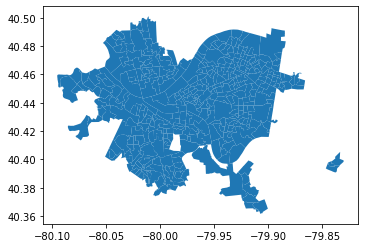

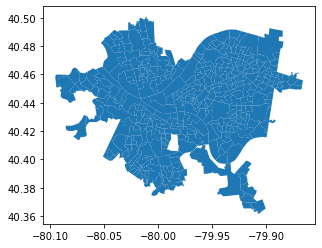

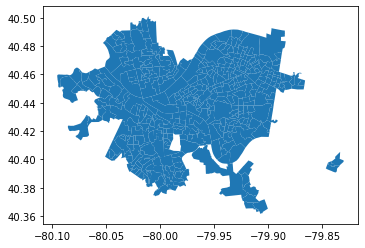

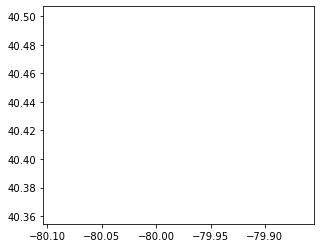

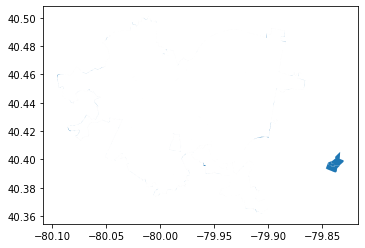

In [34]:
allegheny = gp.read_file("./raw-from-source/Allegheny/Allegheny_County_Voting_District_Boundaries-shp/Allegheny_County_Voting_District_Boundaries.shp")

census_pitt = shapefiles_census[(shapefiles_census["COUNTYFP"]=="003") & (shapefiles_census["NAME"].str.contains("PITTSBURGH"))]
census_pitt.plot()

county_pitt = allegheny[allegheny["LABEL"]=="Pittsburgh"]
county_pitt = county_pitt.to_crs(census_pitt.crs)
county_pitt.plot()

vest_pitt = vest_pa_18[vest_pa_18["NAME"].str.contains("PITTSBURGH")]
vest_pitt.plot()


gp.overlay(census_pitt,vest_pitt,how="symmetric_difference").plot()
gp.overlay(county_pitt,vest_pitt,how="symmetric_difference").plot()

In [35]:
pivoted_2018["shp_join"]=pivoted_2018["cty_pct"].str[0:9]

def shp_combiner(new_name,merge_list):
    global shapefiles_census
    prec_holder = []
    countyfp = new_name[0:3]
    vtdst = new_name[3:9] 
    name = new_name[9:]
    for i in merge_list:
        #shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:].plot()
        prec_holder.append(shapefiles_census.loc[shapefiles_census["cty_pct"]==i,:])
    new_geom = pd.concat(prec_holder, ignore_index=True).unary_union
    new_prec = gp.GeoDataFrame(geometry=[new_geom],columns=shapefiles_census.columns,crs = shapefiles_census.crs)
    new_prec["COUNTYFP"] = countyfp
    new_prec["VTDST"] = vtdst
    new_prec["NAME"] = name
    new_prec["cty_pct"] = countyfp+vtdst+name
    new_prec["shp_join"] = countyfp+vtdst
    shapefiles_census = shapefiles_census.append(new_prec)
    shapefiles_census = shapefiles_census[~(shapefiles_census["cty_pct"].isin(merge_list))]

In [36]:
#Combine certain precincts that are split by CD into one (found these manually)
shp_combiner('00300F397SOUTH FAYETTE DISTRICT 03',['00300F398SOUTH FAYETTE DISTRICT 03 (CD 17)','00300F399SOUTH FAYETTE DISTRICT 03 (CD 18)'])
shp_combiner('00300F408SOUTH FAYETTE DISTRICT 05',['00300F409SOUTH FAYETTE DISTRICT 05 (CD 17)','00300F412SOUTH FAYETTE DISTRICT 05 (CD 18)'])
shp_combiner('019000355CRANBERRY DISTRICT EAST DIVISION 02',['019000353CRANBERRY DISTRICT EAST DIVISION 02 (CD 16)','019000354CRANBERRY DISTRICT EAST DIVISION 02 (CD 17)'])
shp_combiner('019000357CRANBERRY DISTRICT EAST DISTRICT 03',['019000358CRANBERRY DISTRICT EAST DISTRICT 03 (CD 16)','019000359CRANBERRY DISTRICT EAST DISTRICT 03 (CD 17)'])
shp_combiner('019000361CRANBERRY DISTRICT WEST DIVISION 01',['019000362CRANBERRY DISTRICT WEST DIVISION 01 (CD 16)','019000363CRANBERRY DISTRICT WEST DIVISION 01 (CD 17)'])
shp_combiner('019000365CRANBERRY DISTRICT WEST DIVISION 02',['019000366CRANBERRY DISTRICT WEST DIVISION 02 (CD 16)','019000367CRANBERRY DISTRICT WEST DIVISION 02 (CD 17)'])
shp_combiner('019000545JEFFERSON DISTRICT I',['019000546JEFFERSON DISTRICT I (CD 15)','019000547JEFFERSON DISTRICT I (CD 16)'])
shp_combiner('019000555JEFFERSON DISTRICT II',['019000556JEFFERSON DISTRICT II (CD 15)','019000557JEFFERSON DISTRICT II (CD 16)'])
shp_combiner('027000210FERGUSON DISTRICT NORTHEAST DIVISION 01',['027000212FERGUSON DISTRICT NORTHEAST DIVISION 01 A','027000214FERGUSON DISTRICT NORTHEAST DIVISION 01 B'])
shp_combiner('027000262HALFMOON PRECINCT Proper',['027000261HALFMOON PRECINCT Proper (CD 12)','027000263HALFMOON PRECINCT Proper (CD 15)'])
shp_combiner('027000268HALFMOON PRECINCT East Central',['027000265HALFMOON PRECINCT East Central (CD 15)','027000264HALFMOON PRECINCT East Central (CD 12)'])
shp_combiner('029000915PHOENIXVILLE WARD MIDDLE PRECINCT 01',['029000917PHOENIXVILLE WARD MIDDLE PRECINCT 01 (HD 157)','029000919PHOENIXVILLE WARD MIDDLE PRECINCT 01 (HD 155)'])
shp_combiner('041000600NORTH MIDDLETON PRECINCT 01',['041000601NORTH MIDDLETON PRECINCT 01 (CD 10)','041000602NORTH MIDDLETON PRECINCT 01 (CD 13)'])
shp_combiner('041000620NORTH MIDDLETON PRECINCT 03',['041000621NORTH MIDDLETON PRECINCT 03 (CD 10)','041000622NORTH MIDDLETON PRECINCT 03 (CD 13)'])
shp_combiner('061000380PENN',['061000381PENN PRECINCT B (9th Cong)','061000379PENN PRECINCT A (5th Cong)'])
shp_combiner('079000805HAZLE DISTRICT 01',['079000806HAZLE DISTRICT 01 (CD 08)','079000807HAZLE DISTRICT 01 (CD 09)'])
shp_combiner('129002850UNITY DISTRICT PLEASANT UNITY',['129002851UNITY DISTRICT PLEASANT UNITY (CD 13)','129002852UNITY DISTRICT PLEASANT UNITY (CD 14)'])
shp_combiner('133001429YORK WARD 05 PRECINCT 03',['133001428YORK WARD 05 PRECINCT 03 (CD 11)','133001427YORK WARD 05 PRECINCT 03 (CD 10)'])

### Shapefile Adjustments

### Precinct Number Changes

Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

#### Allegheny Adjustments

In [37]:
#No clear changes to make to the Elizabeth Wards and the Pittsburgh Wards appear to be assigned correctly

<AxesSubplot:>

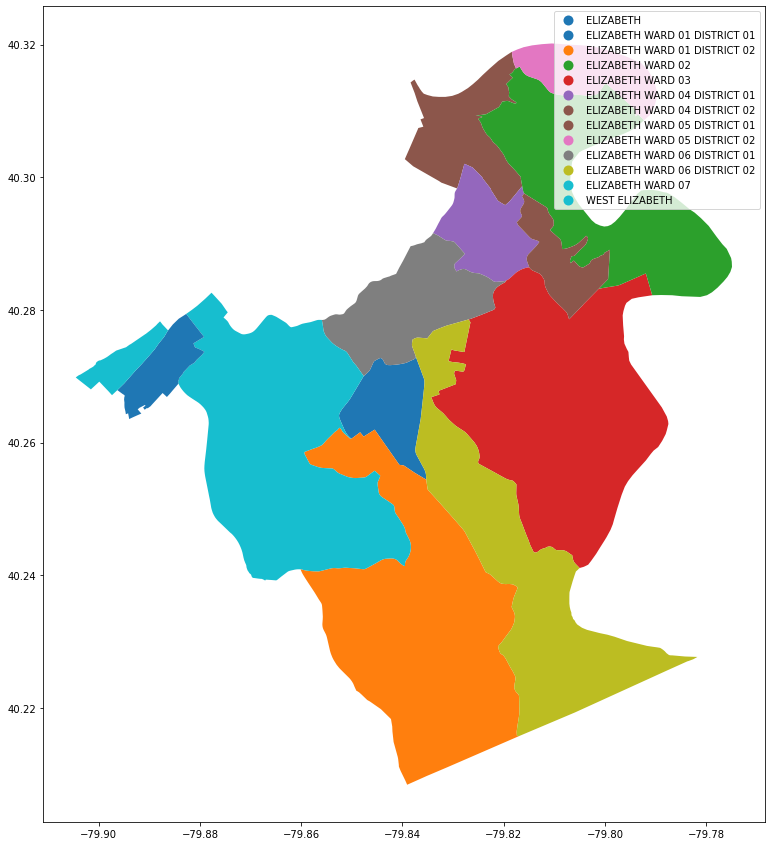

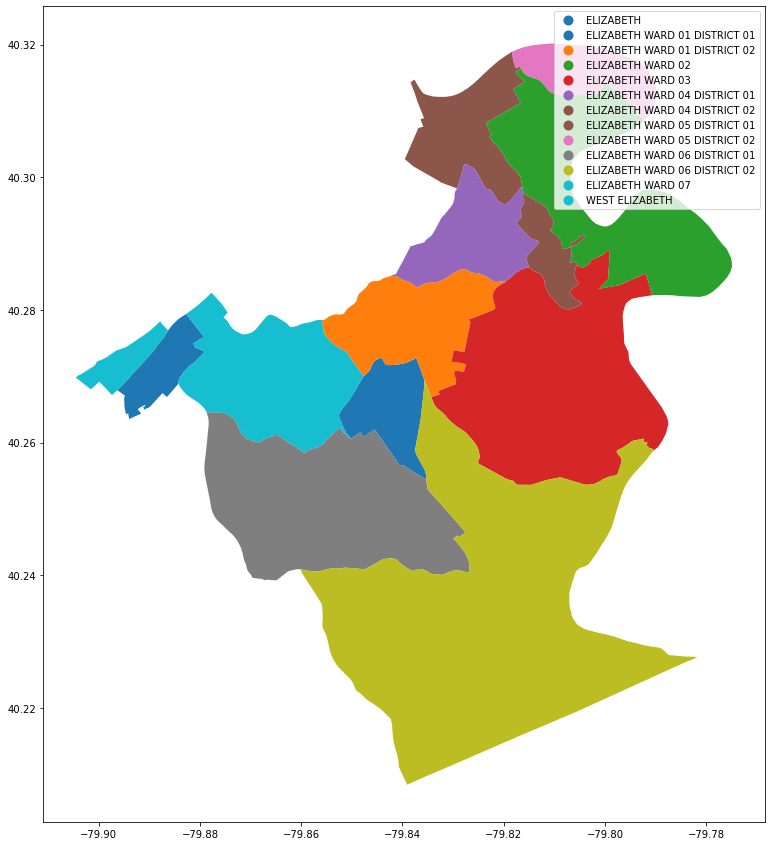

In [38]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ELIZABETH"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("ELIZABETH"))&(vest_pa_18["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))

<AxesSubplot:>

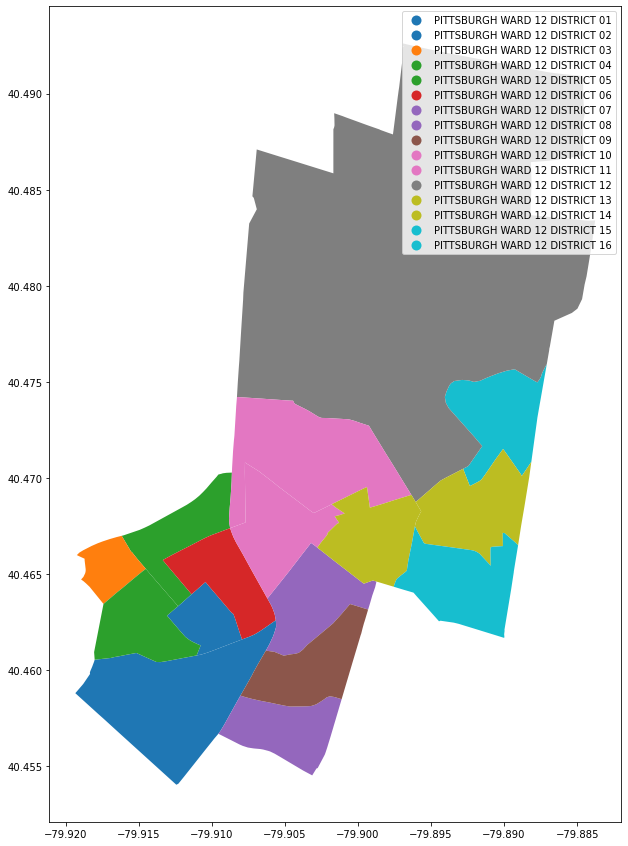

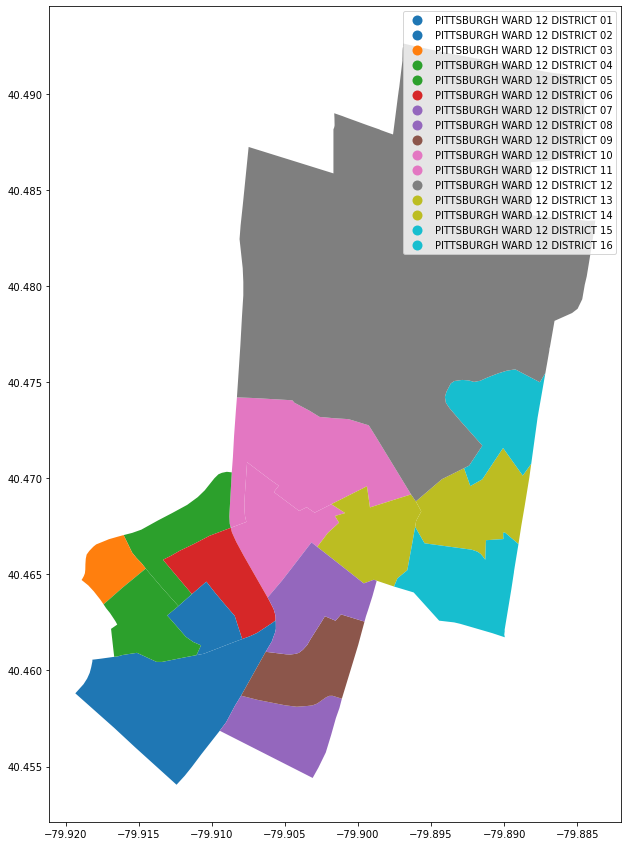

In [39]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("PITTSBURGH WARD 12"))&(shapefiles_census["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("PITTSBURGH WARD 12"))&(vest_pa_18["COUNTYFP"]=="003")].plot(column="NAME",legend=True,figsize=(15,15))

#### Blair Changes

In [40]:
#Swap Greenfield 1 and Greenfield 2 names to match VEST

<AxesSubplot:>

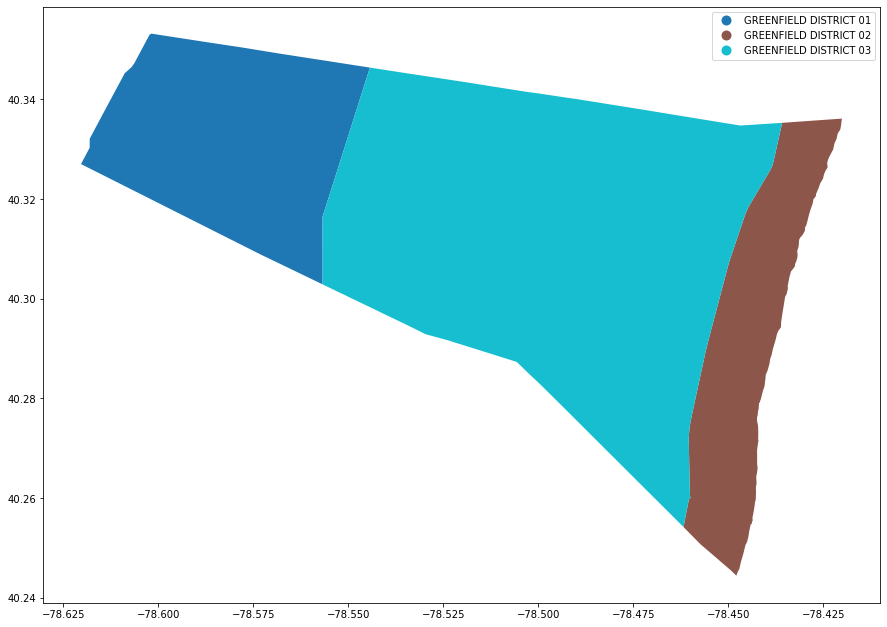

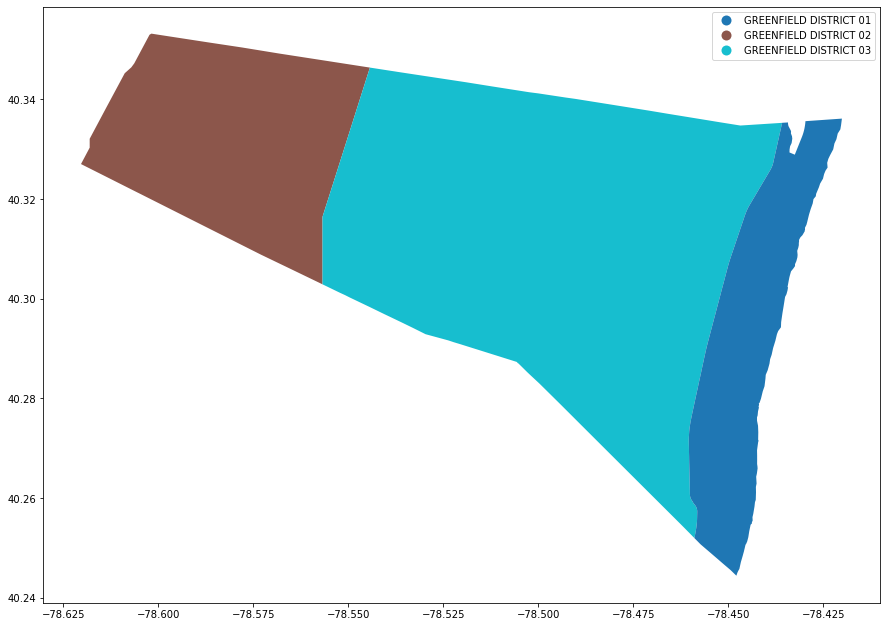

In [41]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("GREENFIELD"))&(shapefiles_census["COUNTYFP"]=="013")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("GREENFIELD"))&(vest_pa_18["COUNTYFP"]=="013")].plot(column="NAME",legend=True,figsize=(15,15))

In [42]:
#The join to the election results uses the "shp_join" column so changing that

print(shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 02"])

shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 01","shp_join"] = "013000590"
shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 02","shp_join"] = "013000580"
#print(shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 01"])
#print(shapefiles_census.loc[shapefiles_census["NAME"]=="GREENFIELD DISTRICT 02"])

     COUNTYFP   VTDST                    NAME  \
1870      013  000580  GREENFIELD DISTRICT 01   

                                               geometry  \
1870  POLYGON Z ((-78.62036 40.32705 0.00000, -78.62...   

                              cty_pct   shp_join  
1870  013000580GREENFIELD DISTRICT 01  013000580  
     COUNTYFP   VTDST                    NAME  \
1871      013  000590  GREENFIELD DISTRICT 02   

                                               geometry  \
1871  POLYGON Z ((-78.46178 40.25435 0.00000, -78.46...   

                              cty_pct   shp_join  
1871  013000590GREENFIELD DISTRICT 02  013000590  


#### Bradford Changes

In [43]:
#Swap Athens District 01 and Athens District 02 to match VEST

<AxesSubplot:>

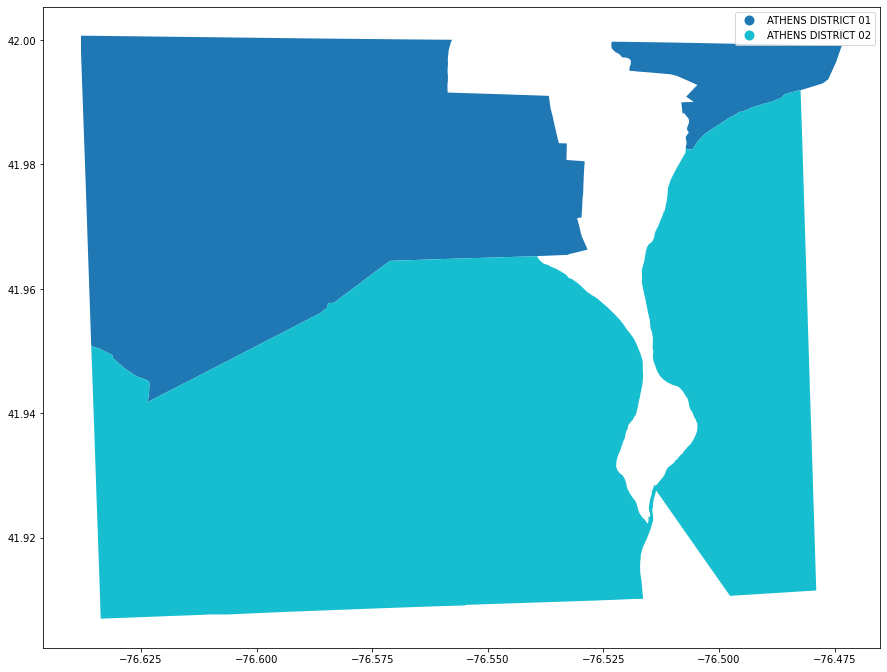

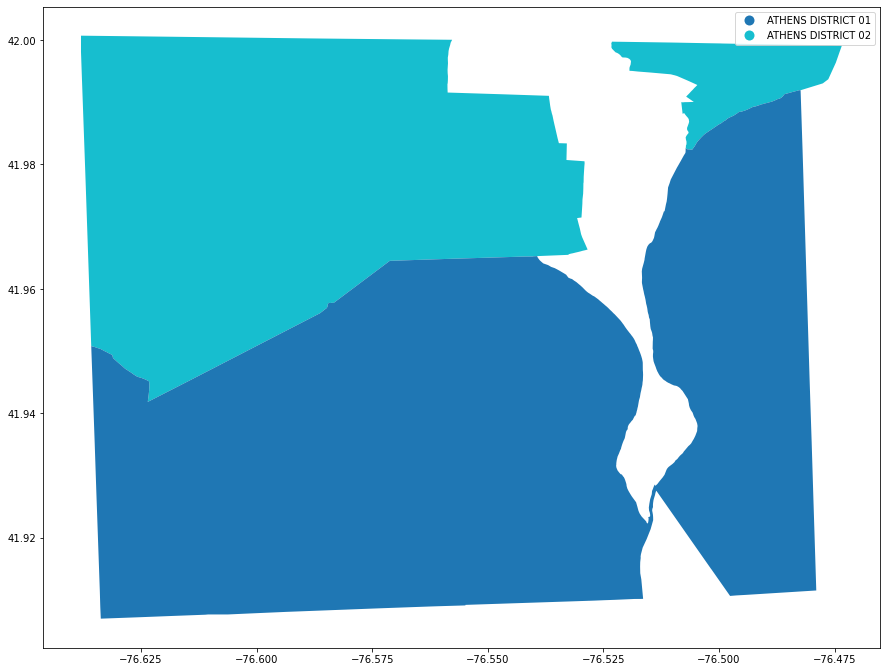

In [44]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("ATHENS DISTRICT"))&(shapefiles_census["COUNTYFP"]=="015")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("ATHENS DISTRICT"))&(vest_pa_18["COUNTYFP"]=="015")].plot(column="NAME",legend=True,figsize=(15,15))

In [45]:
#The join to the election results uses the "shp_join" column so changing that

print(shapefiles_census.loc[shapefiles_census["NAME"]=="ATHENS DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="ATHENS DISTRICT 02"])
shapefiles_census.loc[shapefiles_census["NAME"]=="ATHENS DISTRICT 01","shp_join"] = "015000060"
shapefiles_census.loc[shapefiles_census["NAME"]=="ATHENS DISTRICT 02","shp_join"] = "015000050"

     COUNTYFP   VTDST                NAME  \
1914      015  000050  ATHENS DISTRICT 01   

                                               geometry  \
1914  MULTIPOLYGON Z (((-76.52329 41.99946 0.00000, ...   

                          cty_pct   shp_join  
1914  015000050ATHENS DISTRICT 01  015000050  
     COUNTYFP   VTDST                NAME  \
1918      015  000060  ATHENS DISTRICT 02   

                                               geometry  \
1918  POLYGON Z ((-76.63577 41.95079 0.00000, -76.63...   

                          cty_pct   shp_join  
1918  015000060ATHENS DISTRICT 02  015000060  


#### Greene County

Swap District 01 and 02 to match VEST

<AxesSubplot:>

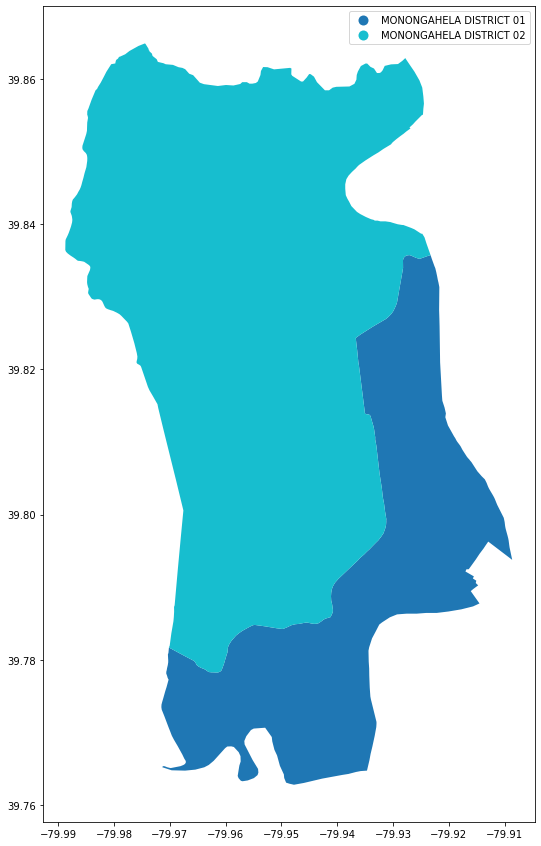

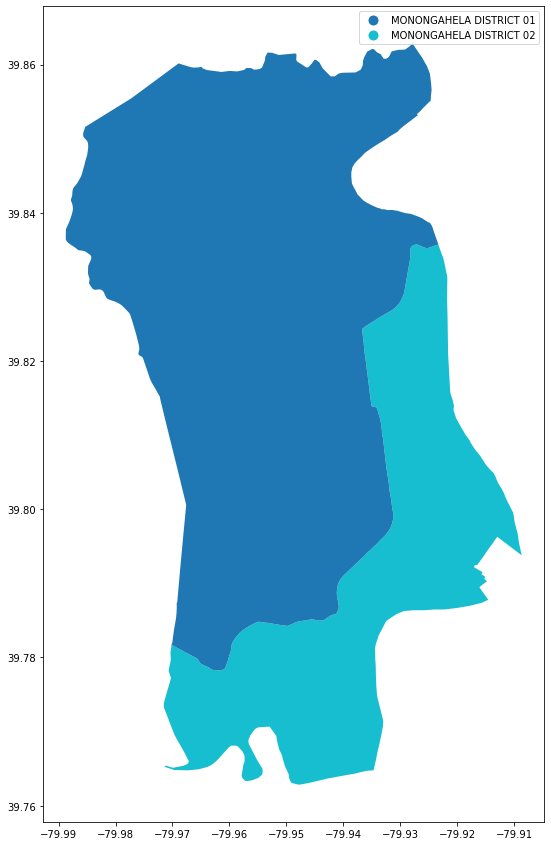

In [46]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("MONONGAHELA"))&(shapefiles_census["COUNTYFP"]=="059")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("MONONGAHELA"))&(vest_pa_18["COUNTYFP"]=="059")].plot(column="NAME",legend=True,figsize=(15,15))

In [47]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[shapefiles_census["NAME"]=="MONONGAHELA DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="MONONGAHELA DISTRICT 02"])
shapefiles_census.loc[shapefiles_census["NAME"]=="MONONGAHELA DISTRICT 01","shp_join"] = "059000295"
shapefiles_census.loc[shapefiles_census["NAME"]=="MONONGAHELA DISTRICT 02","shp_join"] = "059000280"

     COUNTYFP   VTDST                     NAME  \
4220      059  000280  MONONGAHELA DISTRICT 01   

                                               geometry  \
4220  POLYGON Z ((-79.97150 39.77386 0.00000, -79.97...   

                               cty_pct   shp_join  
4220  059000280MONONGAHELA DISTRICT 01  059000280  
     COUNTYFP   VTDST                     NAME  \
4221      059  000295  MONONGAHELA DISTRICT 02   

                                               geometry  \
4221  POLYGON Z ((-79.98871 39.83767 0.00000, -79.98...   

                               cty_pct   shp_join  
4221  059000295MONONGAHELA DISTRICT 02  059000295  


#### Monroe

In [48]:
#The names are different here, but in checking the VTDs they are being mapped to the correct thing

<AxesSubplot:>

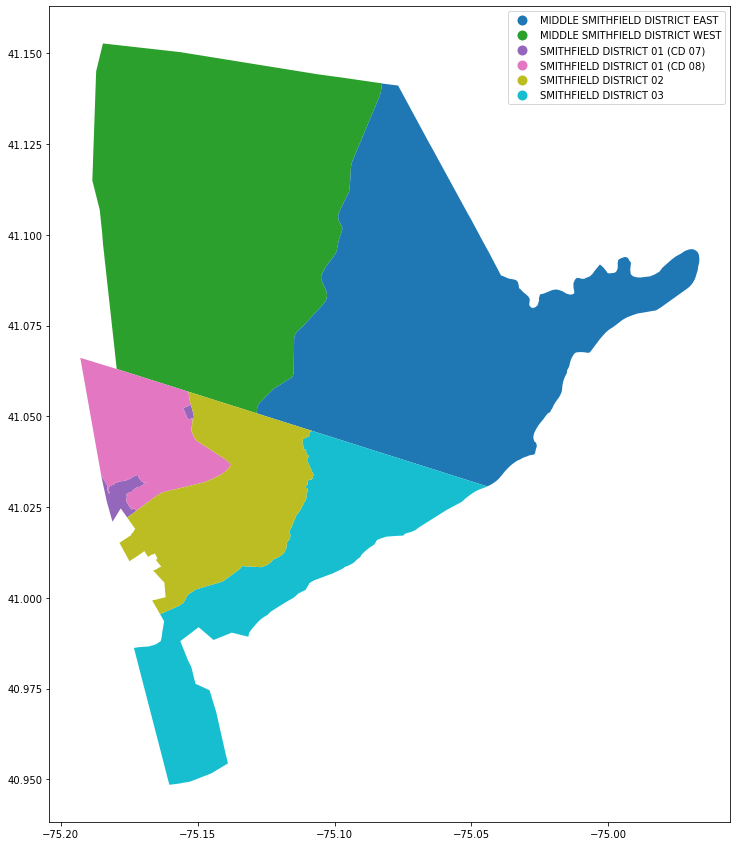

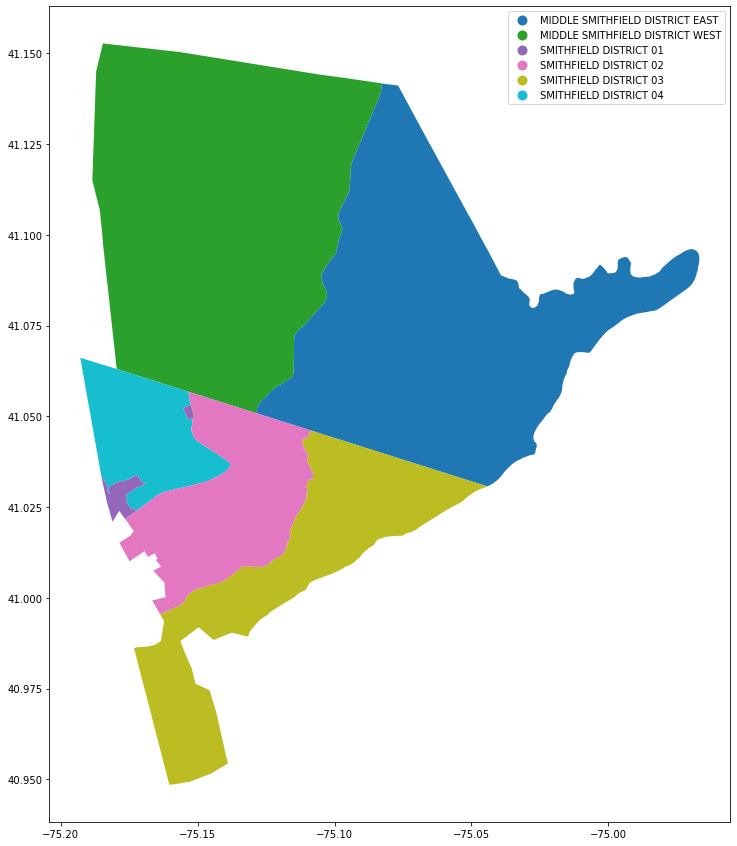

In [49]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SMITHFIELD"))&(shapefiles_census["COUNTYFP"]=="089")].plot(column="NAME",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("SMITHFIELD"))&(vest_pa_18["COUNTYFP"]=="089")].plot(column="NAME",legend=True,figsize=(15,15))

In [50]:
print(shapefiles_census.loc[shapefiles_census["NAME"]=="SMITHFIELD DISTRICT 01 (CD 07)","VTDST"])
print(vest_pa_18.loc[vest_pa_18["NAME"]=="SMITHFIELD DISTRICT 01","VTDST"])

print(shapefiles_census.loc[shapefiles_census["NAME"]=="SMITHFIELD DISTRICT 01 (CD 08)","VTDST"])
print(vest_pa_18.loc[vest_pa_18["NAME"]=="SMITHFIELD DISTRICT 04","VTDST"])

print(shapefiles_census.loc[shapefiles_census["NAME"]=="SMITHFIELD DISTRICT 02","VTDST"])
print(vest_pa_18.loc[vest_pa_18["NAME"]=="SMITHFIELD DISTRICT 02","VTDST"])

print(shapefiles_census.loc[shapefiles_census["NAME"]=="SMITHFIELD DISTRICT 03","VTDST"])
print(vest_pa_18.loc[vest_pa_18["NAME"]=="SMITHFIELD DISTRICT 03","VTDST"])

5592    000251
Name: VTDST, dtype: object
6507    000251
Name: VTDST, dtype: object
5593    000253
Name: VTDST, dtype: object
3296    000253
Name: VTDST, dtype: object
5594    000254
Name: VTDST, dtype: object
6508    000254
Name: VTDST, dtype: object
5591    000256
Name: VTDST, dtype: object
3295    000256
Name: VTDST, dtype: object


Precinct numbers were corrected to match the voter file in the following locales: Allegheny (Elizabeth, Pittsburgh W12), Blair (Greenfield), Bradford (Athens), Greene (Nonongahela), Monroe (Smithfield), Montgomery (Hatfield), Northampton (Bethlehem Twp), Perry (Toboyne), Washington (New Eagle, Somerset), York (Fairview).

#### Montgomery (Hatfield)

In [51]:
#Swap a handful of districts

<AxesSubplot:>

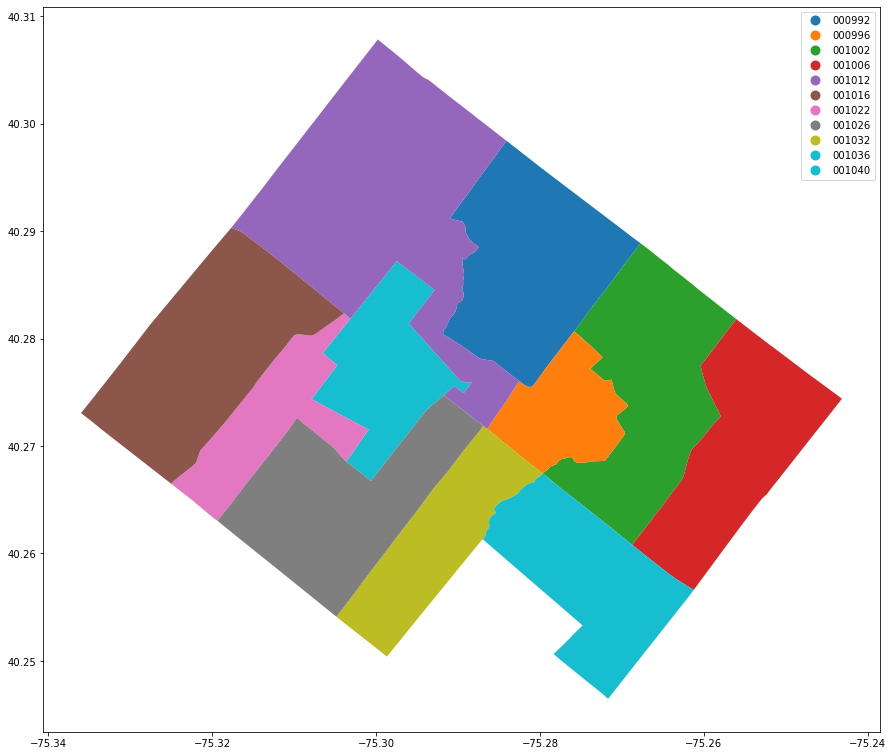

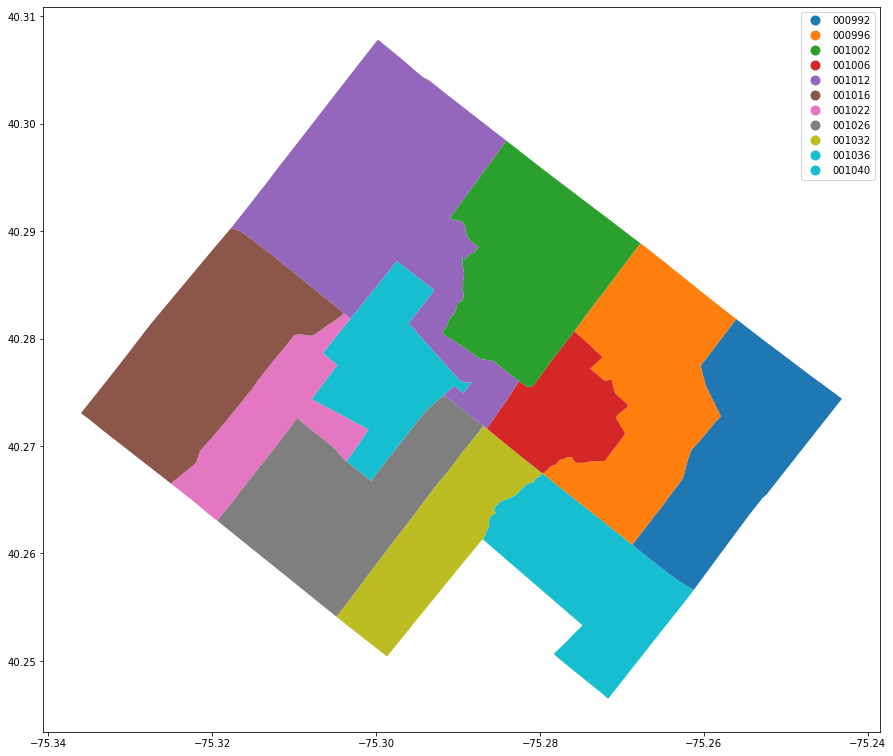

In [52]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("HATFIELD"))&(shapefiles_census["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("HATFIELD"))&(vest_pa_18["COUNTYFP"]=="091")].plot(column="VTDST",legend=True,figsize=(15,15))

In [53]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 01 DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 01 DISTRICT 02"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 02 DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 02 DISTRICT 02"])

shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 01 DISTRICT 01","shp_join"] = "091001002"
shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 01 DISTRICT 02","shp_join"] = "091001006"
shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 02 DISTRICT 01","shp_join"] = "091000996"
shapefiles_census.loc[shapefiles_census["NAME"]=="HATFIELD DISTRICT 02 DISTRICT 02","shp_join"] = "091000992"

     COUNTYFP   VTDST                              NAME  \
5715      091  000992  HATFIELD DISTRICT 01 DISTRICT 01   

                                               geometry  \
5715  POLYGON Z ((-75.29181 40.28048 0.00000, -75.29...   

                                        cty_pct   shp_join  
5715  091000992HATFIELD DISTRICT 01 DISTRICT 01  091000992  
     COUNTYFP   VTDST                              NAME  \
5718      091  000996  HATFIELD DISTRICT 01 DISTRICT 02   

                                               geometry  \
5718  POLYGON Z ((-75.28615 40.27192 0.00000, -75.28...   

                                        cty_pct   shp_join  
5718  091000996HATFIELD DISTRICT 01 DISTRICT 02  091000996  
     COUNTYFP   VTDST                              NAME  \
5713      091  001002  HATFIELD DISTRICT 02 DISTRICT 01   

                                               geometry  \
5713  POLYGON Z ((-75.27967 40.26745 0.00000, -75.27...   

                                        ct

#### Northampton (Bethlehem Twp)

In [54]:
#No changes needed

<AxesSubplot:>

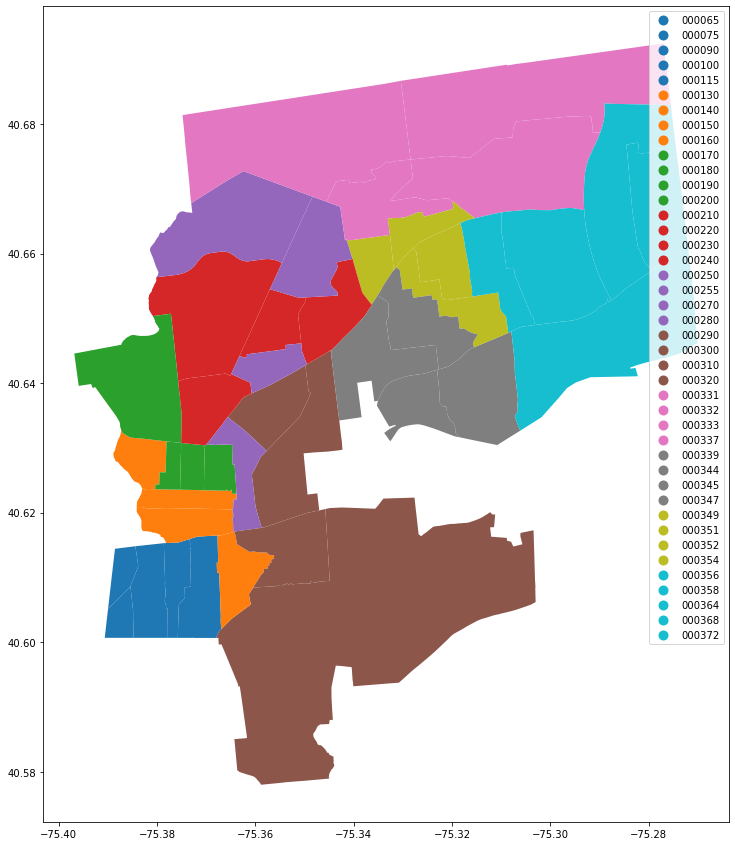

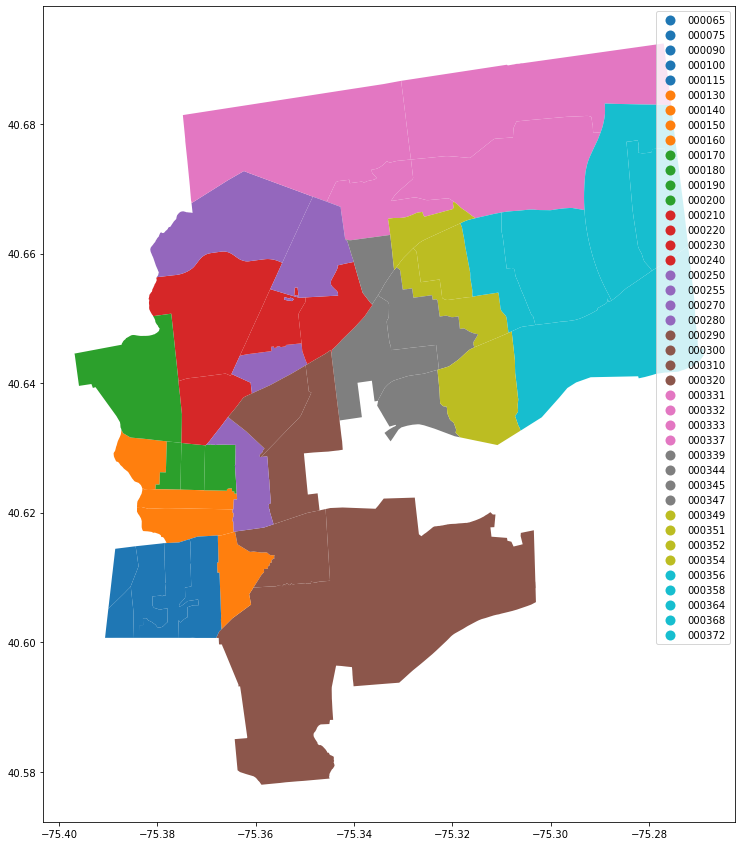

In [55]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("BETHLEHEM"))&(shapefiles_census["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("BETHLEHEM"))&(vest_pa_18["COUNTYFP"]=="095")].plot(column="VTDST",legend=True,figsize=(15,15))

#### Perry (Toboyne)

In [56]:
#Swap 01 and 02 to match VEST

<AxesSubplot:>

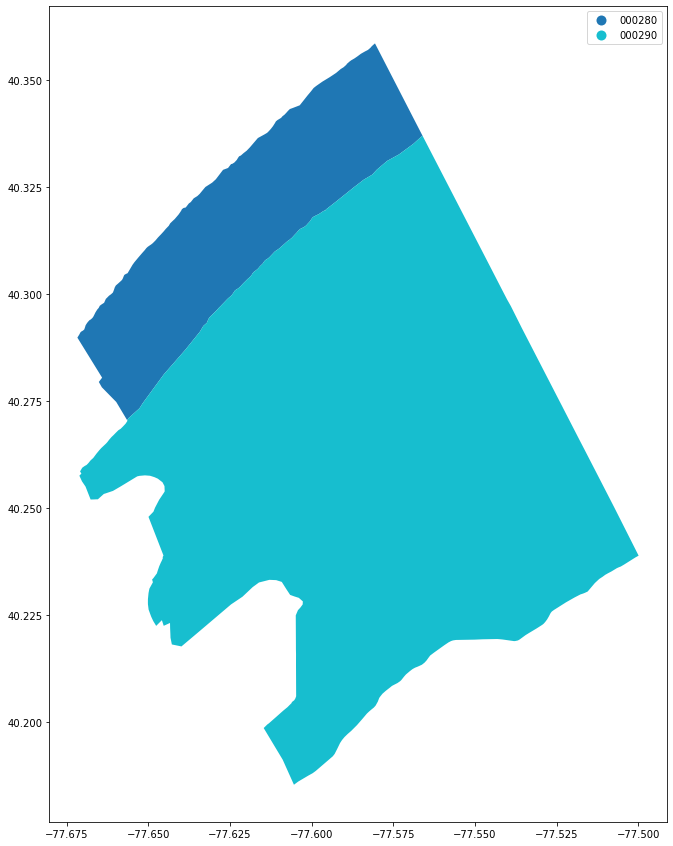

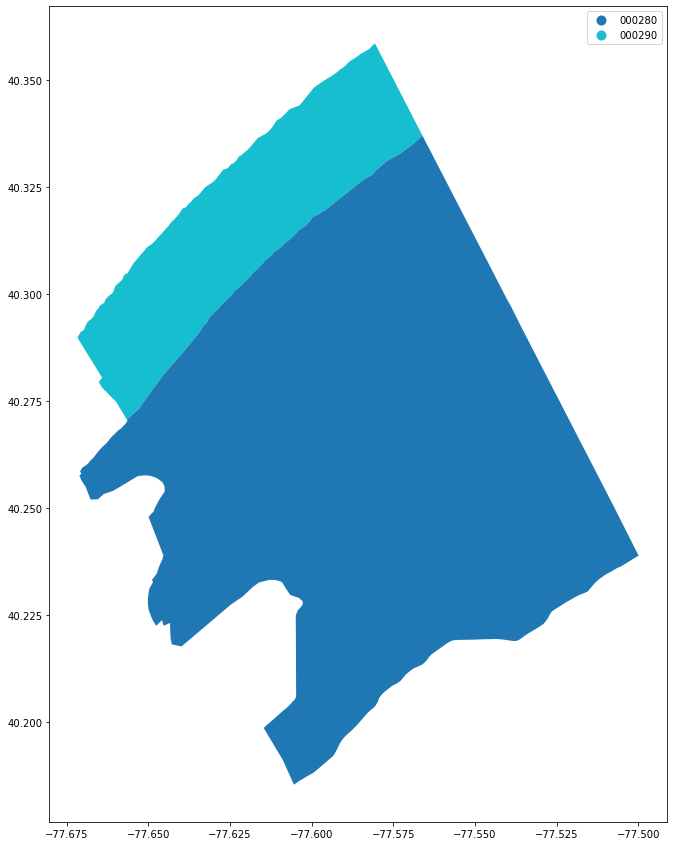

In [57]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("TOBOYNE"))&(shapefiles_census["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("TOBOYNE"))&(vest_pa_18["COUNTYFP"]=="099")].plot(column="VTDST",legend=True,figsize=(15,15))

In [58]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[shapefiles_census["NAME"]=="TOBOYNE DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="TOBOYNE DISTRICT 02"])

shapefiles_census.loc[shapefiles_census["NAME"]=="TOBOYNE DISTRICT 01","shp_join"] = "099000290"
shapefiles_census.loc[shapefiles_census["NAME"]=="TOBOYNE DISTRICT 02","shp_join"] = "099000280"

     COUNTYFP   VTDST                 NAME  \
6300      099  000280  TOBOYNE DISTRICT 01   

                                               geometry  \
6300  POLYGON Z ((-77.67113 40.29060 0.00000, -77.67...   

                           cty_pct   shp_join  
6300  099000280TOBOYNE DISTRICT 01  099000280  
     COUNTYFP   VTDST                 NAME  \
6301      099  000290  TOBOYNE DISTRICT 02   

                                               geometry  \
6301  POLYGON Z ((-77.67115 40.25757 0.00000, -77.67...   

                           cty_pct   shp_join  
6301  099000290TOBOYNE DISTRICT 02  099000290  


#### Washington (New Eagle, Somerset)

In [59]:
#Swap Somerst 01 and Somerset 02. Also swap New Eagle District 01 and New Eagle District 02

<AxesSubplot:>

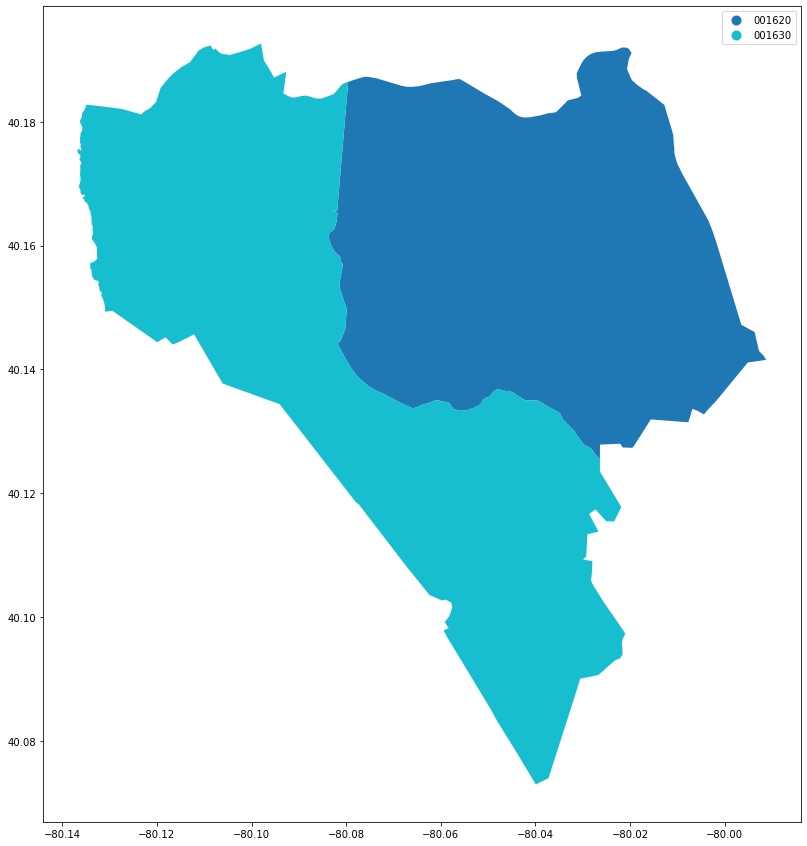

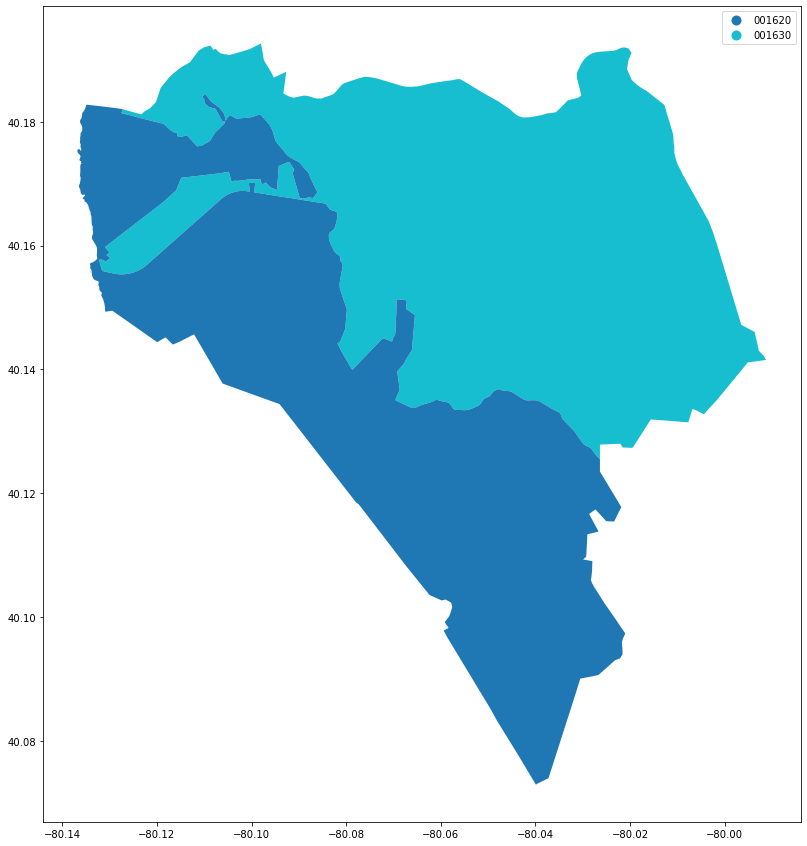

In [60]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("SOMERSET DISTRICT"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("SOMERSET DISTRICT"))&(vest_pa_18["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

In [61]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[(shapefiles_census["NAME"]=="SOMERSET DISTRICT 01") & (shapefiles_census["COUNTYFP"]=="125")])
print(shapefiles_census.loc[(shapefiles_census["NAME"]=="SOMERSET DISTRICT 02") & (shapefiles_census["COUNTYFP"]=="125")])

shapefiles_census.loc[(shapefiles_census["NAME"]=="SOMERSET DISTRICT 01") & (shapefiles_census["COUNTYFP"]=="125"),"shp_join"] = "125001630"
shapefiles_census.loc[(shapefiles_census["NAME"]=="SOMERSET DISTRICT 02") & (shapefiles_census["COUNTYFP"]=="125"),"shp_join"] = "125001620"

     COUNTYFP   VTDST                  NAME  \
8607      125  001620  SOMERSET DISTRICT 01   

                                               geometry  \
8607  POLYGON Z ((-80.08367 40.16164 0.00000, -80.08...   

                            cty_pct   shp_join  
8607  125001620SOMERSET DISTRICT 01  125001620  
     COUNTYFP   VTDST                  NAME  \
8612      125  001630  SOMERSET DISTRICT 02   

                                               geometry  \
8612  POLYGON Z ((-80.13680 40.17532 0.00000, -80.13...   

                            cty_pct   shp_join  
8612  125001630SOMERSET DISTRICT 02  125001630  


<AxesSubplot:>

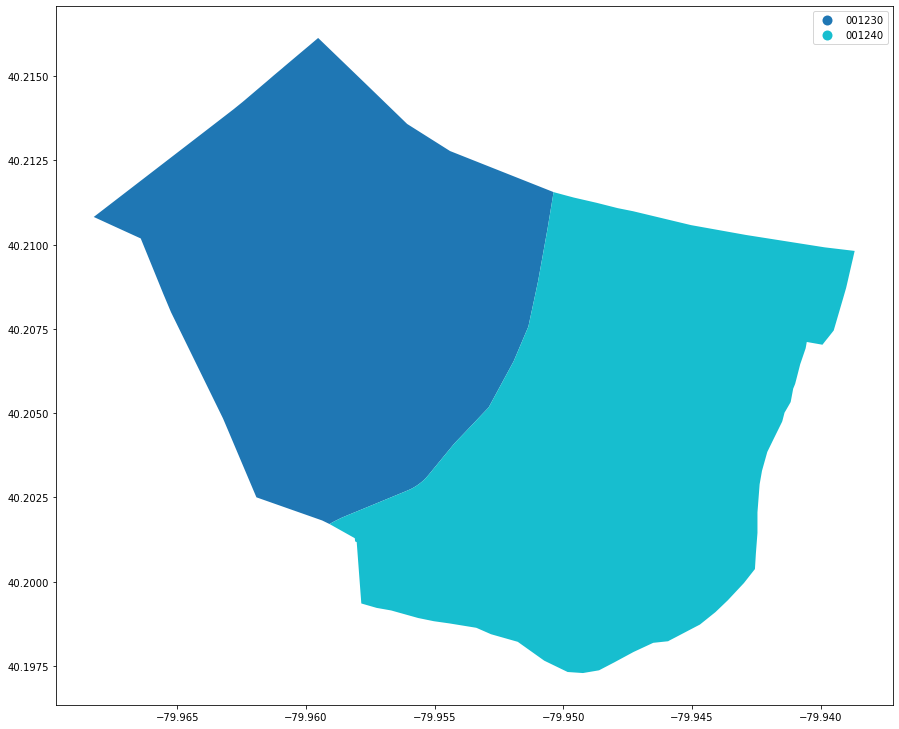

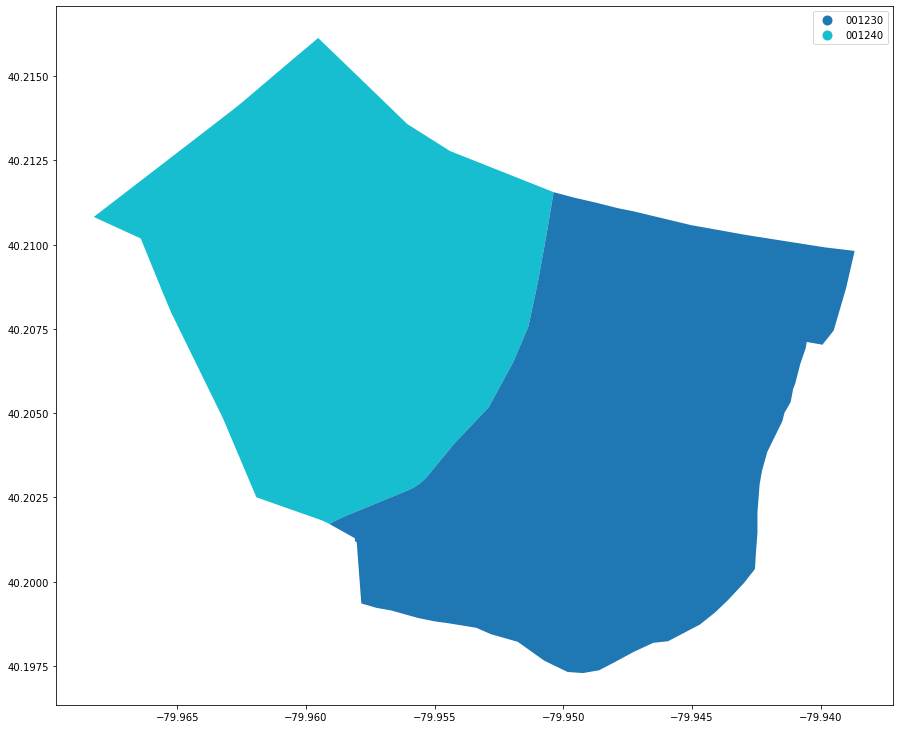

In [62]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("NEW EAGLE"))&(shapefiles_census["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("NEW EAGLE"))&(vest_pa_18["COUNTYFP"]=="125")].plot(column="VTDST",legend=True,figsize=(15,15))

In [63]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[shapefiles_census["NAME"]=="NEW EAGLE DISTRICT 01"])
print(shapefiles_census.loc[shapefiles_census["NAME"]=="NEW EAGLE DISTRICT 02"])

shapefiles_census.loc[shapefiles_census["NAME"]=="NEW EAGLE DISTRICT 01","shp_join"] = "125001240"
shapefiles_census.loc[shapefiles_census["NAME"]=="NEW EAGLE DISTRICT 02","shp_join"] = "125001230"

     COUNTYFP   VTDST                   NAME  \
8570      125  001230  NEW EAGLE DISTRICT 01   

                                               geometry  \
8570  POLYGON Z ((-79.96825 40.21082 0.00000, -79.96...   

                             cty_pct   shp_join  
8570  125001230NEW EAGLE DISTRICT 01  125001230  
     COUNTYFP   VTDST                   NAME  \
8572      125  001240  NEW EAGLE DISTRICT 02   

                                               geometry  \
8572  POLYGON Z ((-79.95890 40.20179 0.00000, -79.95...   

                             cty_pct   shp_join  
8572  125001240NEW EAGLE DISTRICT 02  125001240  


#### York (Fairview)

In [64]:
#Swap four precincts

<AxesSubplot:>

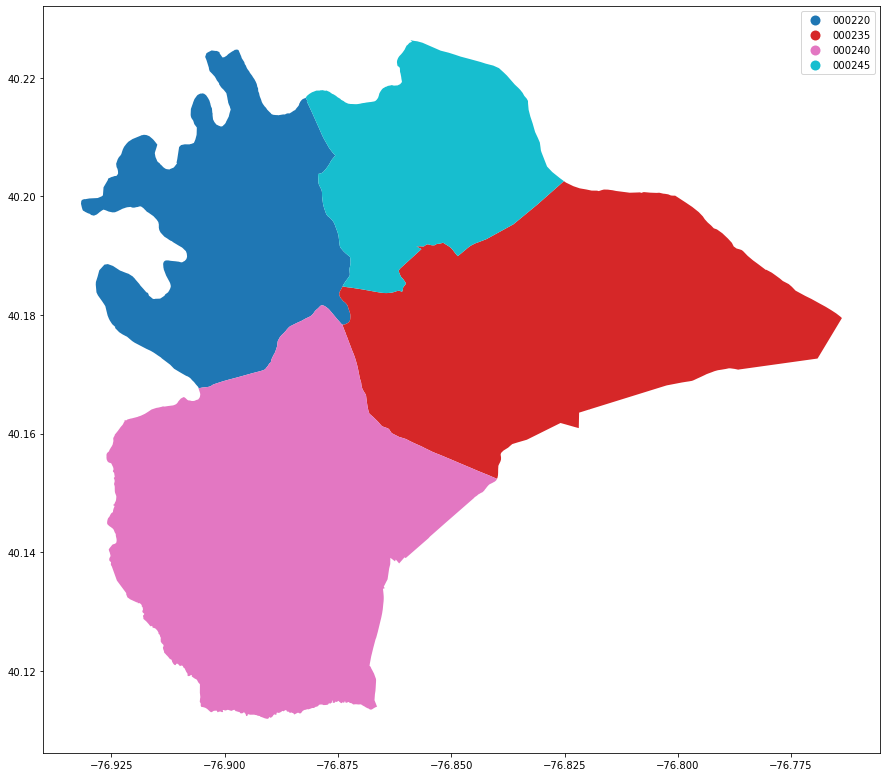

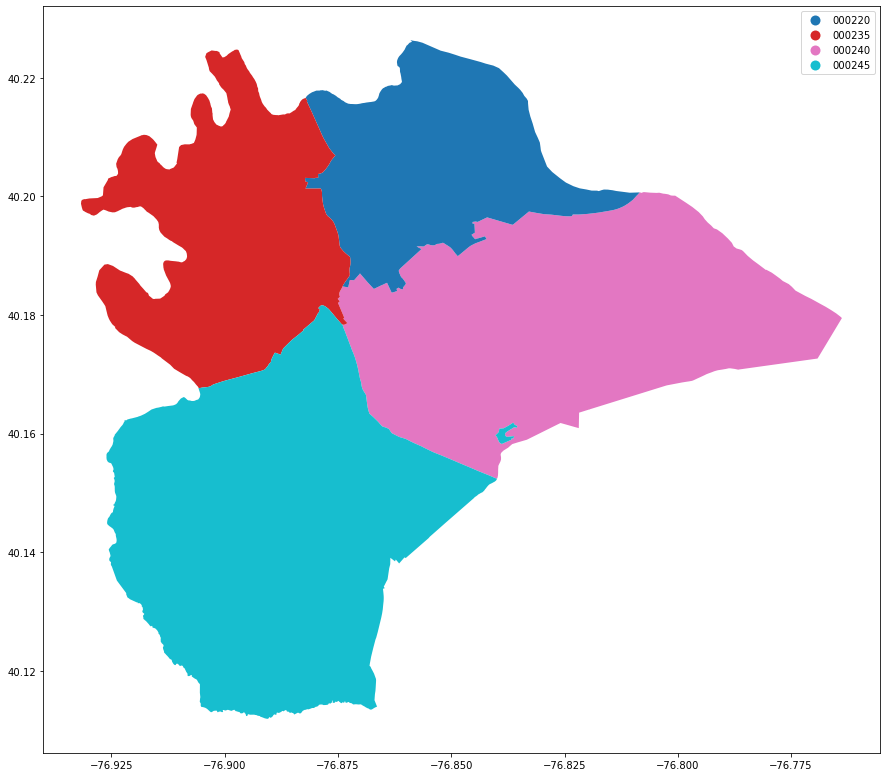

In [65]:
shapefiles_census[(shapefiles_census["NAME"].str.contains("FAIRVIEW DISTRICT"))&(shapefiles_census["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))
vest_pa_18[(vest_pa_18["NAME"].str.contains("FAIRVIEW DISTRICT"))&(vest_pa_18["COUNTYFP"]=="133")].plot(column="VTDST",legend=True,figsize=(15,15))

In [66]:
#The join to the election results uses the "shp_join" column so changing that
print(shapefiles_census.loc[(shapefiles_census["VTDST"]=="000220") & (shapefiles_census["COUNTYFP"]=="133")])
print(shapefiles_census.loc[(shapefiles_census["VTDST"]=="000235") & (shapefiles_census["COUNTYFP"]=="133")])
print(shapefiles_census.loc[(shapefiles_census["VTDST"]=="000240") & (shapefiles_census["COUNTYFP"]=="133")])
print(shapefiles_census.loc[(shapefiles_census["VTDST"]=="000245") & (shapefiles_census["COUNTYFP"]=="133")])

shapefiles_census.loc[(shapefiles_census["VTDST"]=="000220") & (shapefiles_census["COUNTYFP"]=="133"),"shp_join"] = "133000235"
shapefiles_census.loc[(shapefiles_census["VTDST"]=="000235") & (shapefiles_census["COUNTYFP"]=="133"),"shp_join"] = "133000240"
shapefiles_census.loc[(shapefiles_census["VTDST"]=="000240") & (shapefiles_census["COUNTYFP"]=="133"),"shp_join"] = "133000245"
shapefiles_census.loc[(shapefiles_census["VTDST"]=="000245") & (shapefiles_census["COUNTYFP"]=="133"),"shp_join"] = "133000220"

     COUNTYFP   VTDST                  NAME  \
9037      133  000220  FAIRVIEW DISTRICT 01   

                                               geometry  \
9037  POLYGON Z ((-76.93166 40.19916 0.00000, -76.93...   

                            cty_pct   shp_join  
9037  133000220FAIRVIEW DISTRICT 01  133000220  
     COUNTYFP   VTDST                  NAME  \
9038      133  000235  FAIRVIEW DISTRICT 02   

                                               geometry  \
9038  POLYGON Z ((-76.87473 40.18359 0.00000, -76.87...   

                            cty_pct   shp_join  
9038  133000235FAIRVIEW DISTRICT 02  133000235  
     COUNTYFP   VTDST                  NAME  \
9039      133  000240  FAIRVIEW DISTRICT 03   

                                               geometry  \
9039  POLYGON Z ((-76.92608 40.15607 0.00000, -76.92...   

                            cty_pct   shp_join  
9039  133000240FAIRVIEW DISTRICT 03  133000240  
     COUNTYFP   VTDST                  NAME  \
9040      133  00

#### Combine Two Addison Precincts

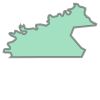

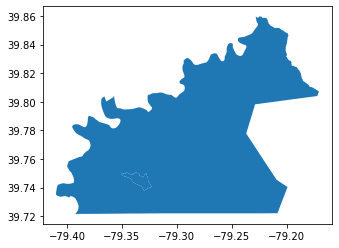

In [67]:
new_geom = shapefiles_census[shapefiles_census["cty_pct"].str.contains("ADDISON")].unary_union
shapefiles_census[shapefiles_census["cty_pct"].str.contains("ADDISON")].plot()
new_geom

In [68]:
shapefiles_census[shapefiles_census["cty_pct"].str.contains("ADDISON")]

shapefiles_census.loc[shapefiles_census["cty_pct"]=="111000010ADDISON","shp_join"]="111ADDISO"
shapefiles_census.loc[shapefiles_census["cty_pct"]=="111000010ADDISON","geometry"]=new_geom

In [69]:
shapefiles_census = shapefiles_census[shapefiles_census["cty_pct"]!="111000020ADDISON"]



In [70]:
print(pivoted_2018[pivoted_2018["shp_join"].str.contains("111ADDISO")])

         cty_pct  G18GOVGGLO  G18GOVLKRA  G18GOVRWAG  G18GOVDWOL  G18USSRBAR  \
8183  111ADDISON           2           7         282         139         282   

      G18USSDCAS  G18USSGGAL  G18USSLKER county  unique_vote_id   shp_join  
8183         136           3           6    111  13628263139282  111ADDISO  


In [71]:
print(vest_pa_18[vest_pa_18["cty_pct"].str.contains("111ADDISO")])

     STATEFP COUNTYFP   VTDST     NAME  G18USSDCAS  G18USSRBAR  G18USSLKER  \
5645      42      111  000010  ADDISON         136         282           6   

      G18USSGGAL  G18GOVDWOL  G18GOVRWAG  G18GOVLKRA  G18GOVGGLO  \
5645           3         139         282           7           2   

                                               geometry  unique_vote_id  \
5645  POLYGON Z ((-79.40984 39.73708 0.00000, -79.40...  11023352117230   

         cty_pct  
5645  111ADDISON  


## Merge Shapefile w/ Precinct Results

In [72]:
merge_two = pd.merge(pivoted_2018,shapefiles_census,how="outer",on="shp_join",indicator=True)

print(merge_two["_merge"].value_counts())
right_only = merge_two[merge_two["_merge"]=="right_only"]
left_only = merge_two[merge_two["_merge"]=="left_only"]
print(right_only["shp_join"])
print(left_only["shp_join"])

both          9153
right_only       7
left_only        5
Name: _merge, dtype: int64
9158    0130040P1
9159    029000036
9160    0310400P1
9161    0370335P1
9162    091001085
9163    091002195
9164    097000871
Name: shp_join, dtype: object
5711    091001084
5712    091001086
5854    091002194
5855    091002196
5861    091002492
Name: shp_join, dtype: object


In [73]:
merge_two.drop(['cty_pct_y'], axis=1,inplace=True)
merge_two.rename(columns={"cty_pct_x":"cty_pct"},inplace=True)
merge_two = merge_two[['COUNTYFP','VTDST', 'NAME','G18USSDCAS','G18USSRBAR',
                      'G18USSLKER','G18USSGGAL','G18GOVDWOL','G18GOVRWAG','G18GOVLKRA',
                      'G18GOVGGLO','geometry','cty_pct','_merge']]

In [74]:
merge_two.loc[:,"NAME"]=merge_two.loc[:,"cty_pct"].str[9:]

### Final Join

In [75]:
final_merge = pd.merge(merge_two[merge_two["_merge"]=="both"],vest_pa_18,how="outer",on="cty_pct",indicator="final_merge")

In [76]:
final_merge.columns

Index(['COUNTYFP_x', 'VTDST_x', 'NAME_x', 'G18USSDCAS_x', 'G18USSRBAR_x',
       'G18USSLKER_x', 'G18USSGGAL_x', 'G18GOVDWOL_x', 'G18GOVRWAG_x',
       'G18GOVLKRA_x', 'G18GOVGGLO_x', 'geometry_x', 'cty_pct', '_merge',
       'STATEFP', 'COUNTYFP_y', 'VTDST_y', 'NAME_y', 'G18USSDCAS_y',
       'G18USSRBAR_y', 'G18USSLKER_y', 'G18USSGGAL_y', 'G18GOVDWOL_y',
       'G18GOVRWAG_y', 'G18GOVLKRA_y', 'G18GOVGGLO_y', 'geometry_y',
       'unique_vote_id', 'final_merge'],
      dtype='object')

In [77]:
final_merge["final_merge"].value_counts()

both          9153
right_only       6
left_only        0
Name: final_merge, dtype: int64

In [78]:
print(final_merge[final_merge["final_merge"]=="right_only"]["cty_pct"])

9153                       097000871UPPER MAHANOY(CD 09)
9154    091001086HORSHAM DISTRICT 02 DIVISION 02 A (S07)
9155          091001084HORSHAM DISTRICT 02 DIVISION 02 B
9156                    091002194PERKIOMEN DISTRICT 01 A
9157              091002196PERKIOMEN DISTRICT 01 B (S07)
9158          091002492PLYMOUTH DISTRICT 02 DIVISION 03B
Name: cty_pct, dtype: object


### Join Merged Sourcefile to VEST

In [79]:
both = final_merge[final_merge["final_merge"]=="both"]
source_geoms = gp.GeoDataFrame(both,geometry="geometry_x",crs=vest_pa_18.crs)
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_y",crs=vest_pa_18.crs)
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     6138
False    3015
dtype: int64


## Check differences across the entire merged df

In [80]:
#Note: To speed this up, one could filter out the "geom_almost_equals" true values

In [81]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))
    if (False):
        if (area > 1):
            count += 1
            name = source_geoms.iat[i,12]
            print(str(count)+") For " + name + " difference in area is " + str(area))
            if (intersection.iloc[0].is_empty):
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                base.set_title(name)
            else:
                base = diff.plot(color="red")
                source_geoms.iloc[[i]].plot(color="orange",ax=base)
                vest_geoms.iloc[[i]].plot(color="blue",ax=base)
                intersection.plot(color="green",ax=base)
                base.set_title(name)

In [84]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and .1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between .1 and .5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between .5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(9153, 1)
6140 precincts w/ a difference of 0 km^2
2510 precincts w/ a difference between 0 and .1 km^2
322 precincts w/ a difference between .1 and .5 km^2
97 precincts w/ a difference between .5 and 1 km^2
53 precincts w/ a difference between 1 and 2 km^2
17 precincts w/ a difference between 2 and 5 km^2
14 precincts w/ a difference greater than 5 km^2


## Plot differences greater than a certain threshold (2 km^2 currently)

On the plots: orange is sourcefile geometries, blue is VEST geometry and green is intersection

1) For 021000210CAMBRIA DISTRICT 01 difference in area is 9.869298162648409
2) For 021000190CAMBRIA DISTRICT COLVER difference in area is 5.055626188357371
3) For 021000710JACKSON DISTRICT VINCO difference in area is 6.553593618030251
4) For 021000720JACKSON DISTRICT 01 difference in area is 6.11573403311768
5) For 021000730JACKSON DISTRICT 03 difference in area is 11.535703894324453
6) For 023000090SHIPPEN DISTRICT EAST difference in area is 8.102453353061103
7) For 023000100SHIPPEN DISTRICT WEST difference in area is 8.102453353061104
8) For 033000070BRADFORD PRECINCT 01 difference in area is 6.6600718475984175
9) For 033000080BRADFORD PRECINCT 02 difference in area is 6.660071659600092
10) For 047000110HORTON TWP N difference in area is 6.437427500967975
11) For 047000110HORTON TWP S difference in area is 19.786171086914045
12) For 075000510UNION DISTRICT GREEN PT. difference in area is 5.3891926082138975
13) For 075000520UNION DISTRICT LICKDALE difference in area is 5.3891926082533

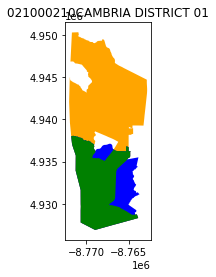

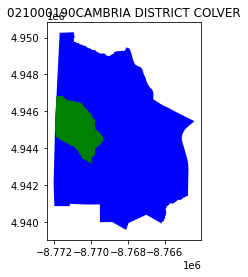

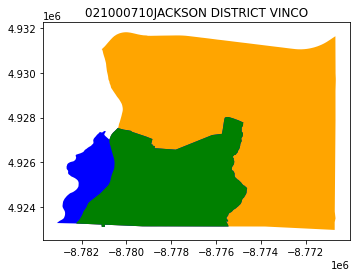

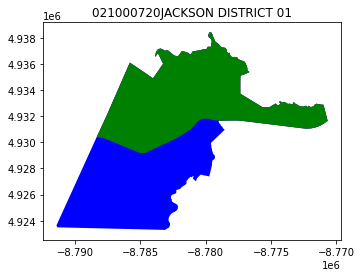

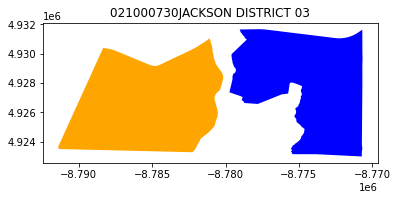

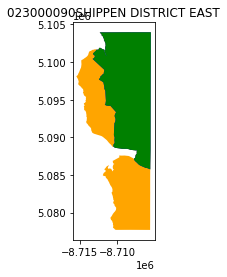

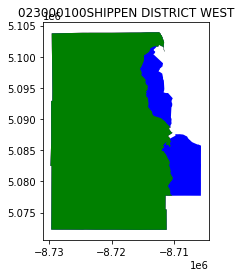

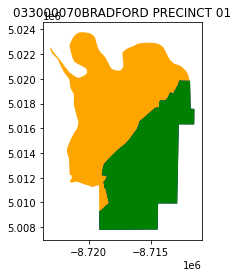

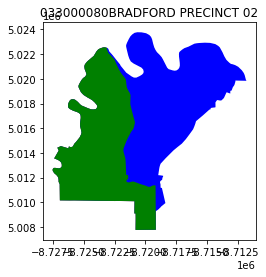

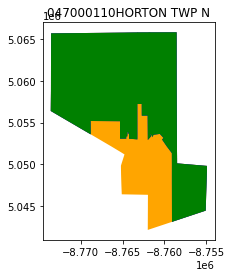

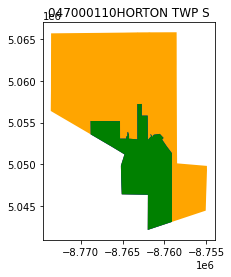

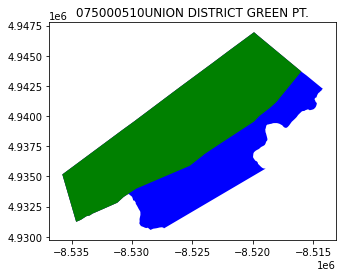

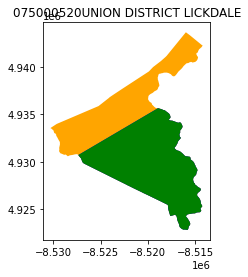

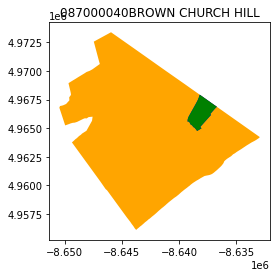

In [85]:
count = 0
for i in range(0,len(source_geoms[~vals])):
    diff = source_geoms[~vals].iloc[[i]].symmetric_difference(vest_geoms[~vals].iloc[[i]])
    intersection = source_geoms[~vals].iloc[[i]].intersection(vest_geoms[~vals].iloc[[i]])
    area = float(diff.area/10e6)
    #print("Area is " + str(area))
    if (area > 5):
        count += 1
        name = source_geoms[~vals].iat[i,12]
        print(str(count)+") For " + name + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = source_geoms[~vals].iloc[[i]].plot(color="orange")
            vest_geoms[~vals].iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = source_geoms[~vals].iloc[[i]].plot(color="orange")
            vest_geoms[~vals].iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)